<center> <h1>Predicting the Zodiac: Can a model predict your Zodiac based on survey responses?</h1>

By: Jennifer Eyring, Jemison cohort
    
Date: July 1, 2022

## <u>Why I chose this project</u>

After a friend referred me to the General Social Survey, it was clear to me that because of the large variety of responses collected from this survey, so many angles could be collected--especially about the human experience; <i>(ie how people think, create opinions and respond.)</i>

The fact that this survey not only collected data on demographics, religionious/spiritual beliefs, opinions, political views etc, <b>it was intriguing to find that they also asked if participants knew their zodiac</b>.

Even more interesting to me was the fact that when it came to nulls in the survey of people not responding or not knowing, zodiac was one of the questions that majority of the participants fulfilled/knew AND responded to.

Though the zodiac and astrology have gone under much debate, especially in its validity in the social and scientific fields, many people still seem intrigued and know what sign they are--even if they do not know what 'attributes' are supposively connected to these signs. This project is more of an interest-piece and model.

<b>This project is not only a take on the human perspective and if it can actually be measured in an astrological-way but to also see and possibly debunk the idea that our opinions and the way we decide on things are related to the time of year we were born</b>. 

### Quick Links ⬇️⬇️<a name='quick_links'></a>
*READ ME: <br>To utilize quick links, please download this jupyter notebook, for full link access!
<u><h3>Table of Contents (Quicklinks)<br></h3>
<a href='#introduction'>Introduction</a><br>
<a href='#About the Data'>About the Data</a><br>
<a href='#Wrangle Process'>Wrangle Process</a><br>
<a href='#Splitting the Data'>Splitting the Data</a><br>
<a href='#Exploring the data'>Exploring the Data</a><br>
<a href='#Hypothesis Testing'>Hypothesis Testing</a><br>
<a href='#Astrology Fun'>Astrology Fun</a><br>
<a href='#Driver Viz'>Driver Visualizations</a><br>
<a href='#Modeling'>Modeling</a><br>
<a href='#Baseline'>Creating Baseline Model</a><br>
<a href='#MVP'>Chosen Model and Outcomes</a><br>
<a href='#Takeaway'>Project Takeaways and Next Steps</a><br>   

# Introduction:<a name='introduction'></a>
<div class="alert alert-info"><i> CAN A PREDICTIVE MODEL OF SURVEY RESPONSES ACTUALLY SHOW WHAT ZODIAC SIGN (aka Sun sign) A PERSON IS?</div>
  
## Project Objectives: 
    Taking the GSSurvey participant responses from 2021 dataset and comparing them to the participants zodiac birth signs, I will be trying to create a predictive Classification model to see if it is possible to determine a person's zodiac sign based on participants observed responses on opinion, politics, beliefs and more.

>ABOUT THE GENERAL SOCIAL SURVEY:
    <br>Since 1972, the General Social Survey (GSS) has been conducted annually by the Univeristy of Chicago to measure the responses of contemporary American Society--through the lens of adult survey participants.
    

The GSSurvey asks US adults questions related to current demographics, opinions, religious/spiritual beliefs, political and life view points, social class opinions, as well even recording peoples zodiac signs.
    

> ABOUT THE ZODIAC (SUN) SIGNS:
    <br>    
    As many viewpoints on Astrology overall seem to be changing, oftentimes in terms of self-identity and decision factors, this project is taking a look at zodiac signs (using participants Sun Sign) to determine if the responses of the US adult partipants of the GSS actually correlates to the astrological sun signs they provided and align with.

<div class="alert alert-warning"><i>What is a Sun Sign?</i>
- In astrology, a person's Sun sign is often thought to be the "personality or 'doing' self" of one's birth chart (Robbins, Heidi. 2022). 
<br>It is what our personalities often reflect in our everyday settings.<br> The question, "What's your sign?" is referring to the Sun sign. The measure of this zodiac sign of a person's astrological birth chart is mostly determined by where the sun was in relation to where & when the person was born (month & day), hence our "birth" sign is often referred to as the Sun sign.</div><br>
*These yellow boxes hold fun facts about astrology and things found when researching and building this model.


# About the Data:<a name='About the Data'></a>

As the <a href="https://gss.norc.org/get-the-data " title="GSS 2021">GSS 2021</a> is a general survey of each participant's response on their beliefs, opinions, demographics, and relationships, this model will be using the Zodiac responses as a general way to see if one's sign can actually be predicted by certain responses, and if a model could actually be built on this. 

<b>The columns selected pulled from the GSS data in this project where done so by targeting key points of interest that are often covered in astrology:
- Career
- Relationships
- Opinions
- Health (physical and mental)
- Political stance/view points
- Religion/Spirituality
- Interests
- and Overall outlook of others and life

<a href='#quick_links'>Back to Quick Links</a>

# Wrangle Data Process: <a name='Wrangle Process'></a>

In the process of acquiring and preparing the data for the exploration process, these are some key takeaways that occured during the wrangling process.

In [1]:
#data science importations used
import pandas as pd
import numpy as np

#visualizations/charts
import matplotlib.pyplot as plt
import seaborn as sns

#made support files
import wrangle
import explore
import viz
import model
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

>## Quick-look at Wrangle notes:

<div class="alert alert-info">- <b>DATA SIZE:
 From the original 713 questions (columns) of the dataset, I read through and selected:
    <br>- 66 columns (of questions) with 4,032 rows</div>
    
- I only acquired the <a href="https://gss.norc.org/get-the-data " title="GSS 2021">GSS 2021</a> stata version of this dataset. 
- `age` column was changed to `int` dtype
- All other columns were changed from `Categorical` to `object` dtypes.
- Target variable `zodiac` was also encoded to create continous variables for charts and stats tests.
- All nulls of `zodiac` were dropped.
- Remaining nulls were `.fillna` as `unknown` as many survey categories had random places that participants had not answered.
    
    
- Suggestions: I would suggest pulling in and merging several years of the GSS answers, as in the end my training set wasn't as large as I was hoping.

<b>Step-by-Step Wrangle process:</b>
<br>1) Pulling the 2021 GSS survey responses from a strata dataset. More details of how acquired in wrangle.py file.<br>2) Grabbed only the columns that were wanted for zodiac specific responses. <br> 3) Changing the dtypes. The strata file will pull in everything as Categorydtypes. Changing the full dataframe to objects and then selecting age for int dtypes was easiest way to handle.<br>4) Handling Nulls: Any nulls held in the zodiac column were automatically dropped, but then since the responses were not 'required' for participants to fill out, many rows of participants would have one or two questions NaN. So as not to lose many of the participant responses, these were turned into 'unknown'. <br>5) Handling Age: This column was a bit difficult to turn into an int dtype at first due to one variable being named '89 or older'. Once one column was targeted and the variable identified, I used this pathway to create a np.where function to change age dtype.

In [2]:
df = wrangle.acquire_prep()
df.head(2)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,socbar,socrel,socommun,socfrend,satsoc,class,satfin,quallife,partners,partnrs5
0,pisces,white,65.0,female,heterosexual or straight,married,"in a medium-size city (50,000-250,000)",new england,high school,unknown,...,unknown,unknown,unknown,unknown,fair,middle class,more or less satisfied,good,1 partner,1 partner
1,pisces,white,60.0,male,unknown,divorced,"in a large city (over 250,000)",pacific,bachelor's,refused,...,several times a month,several times a year,once or twice a week,several times a month,very good,upper class,pretty well satisfied,excellent,unknown,unknown


<a href='#quick_links'>Back to Quick Links</a>

# Splitting the Data Process: <a name='Splitting the Data'></a>
<br>
I split the data into train, validate and test using random_state as 13 to keep each run of data the same sequence, since I had to continue re-running the notebooks while producing the EDA and modeling process. 

In [3]:
#size of each split data:
train, validate, test = wrangle.split(df)

Train: 2499 rows, 66 cols
Validate: 625 rows, 66 cols
Test: 552 rows, 66 cols


# Exploration (EDA) of the dataset: <a name='Exploring the data'></a>
<br>Exploring the train dataset to find key drivers of predicting participants zodiac sign. (ie which survey questions best help predict their birth sign?)

>## Quick-look at EDA notes:

<div class="alert alert-info"><b>
-  Capricorn is the most common zodiac in this dataset. It could skew the results a bit.<br>
-  Occ10 (occupation of participants) was written by participants individually, hence so many unique values.</div>

### Showing the overall distribution of value_counts of the training data variables:

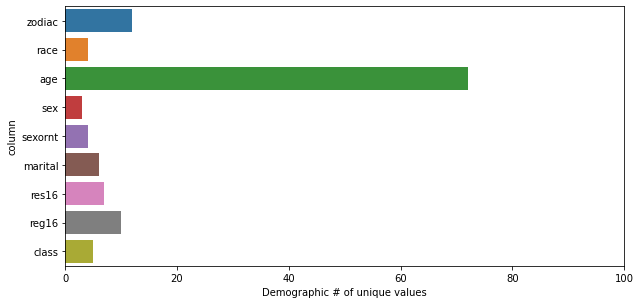

In [4]:
viz.dist_data1(train)

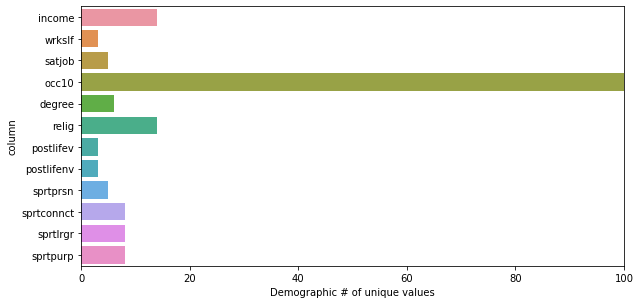

In [5]:
viz.dist_data2(train)

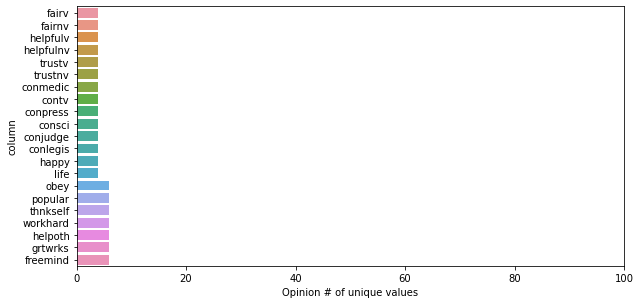

In [6]:
viz.dist_data3(train)

## Visualizing the Target: Zodiac counts
This was helpful to just visually see which zodiac counts were more prominent than others between participants.

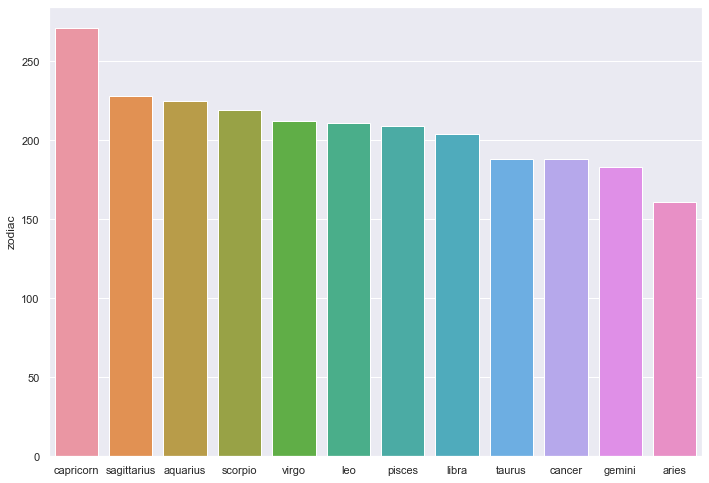

In [7]:
viz.zodiac_cnt(train)

<a href='#quick_links'>Back to Quick Links</a>

### Variables Exploration: 
- Looking at each value count with a closer inspection for survey responses/questions asked and value counts there.

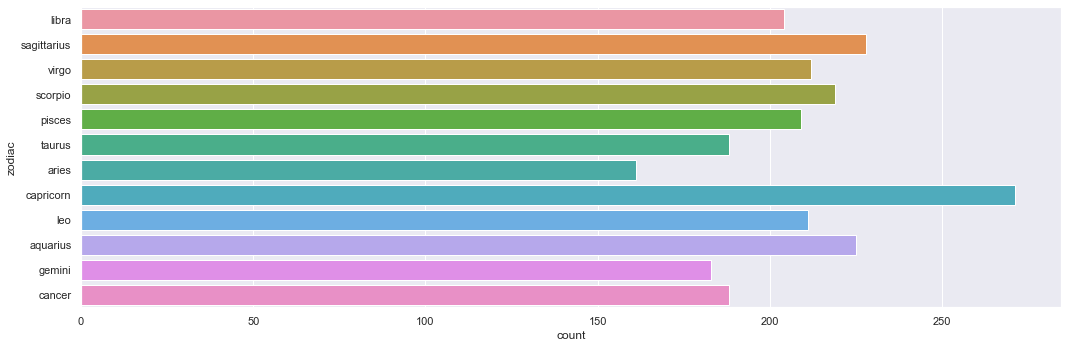

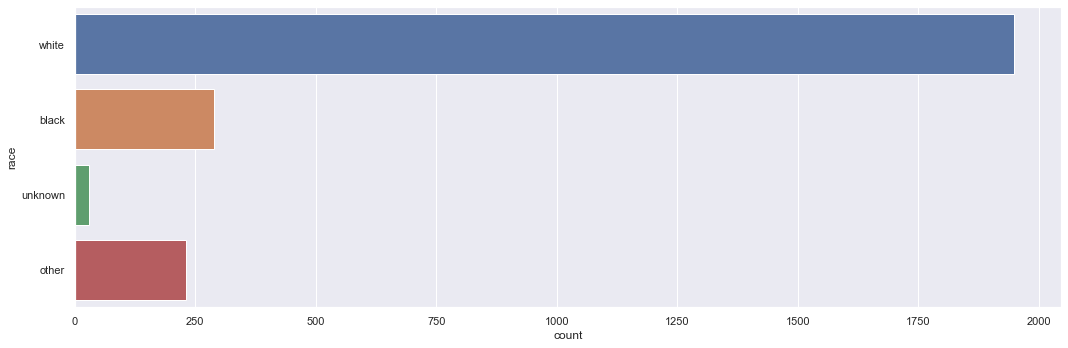

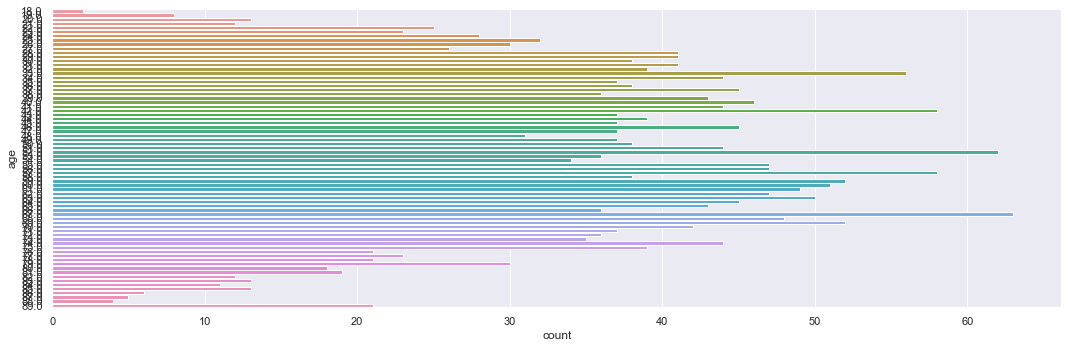

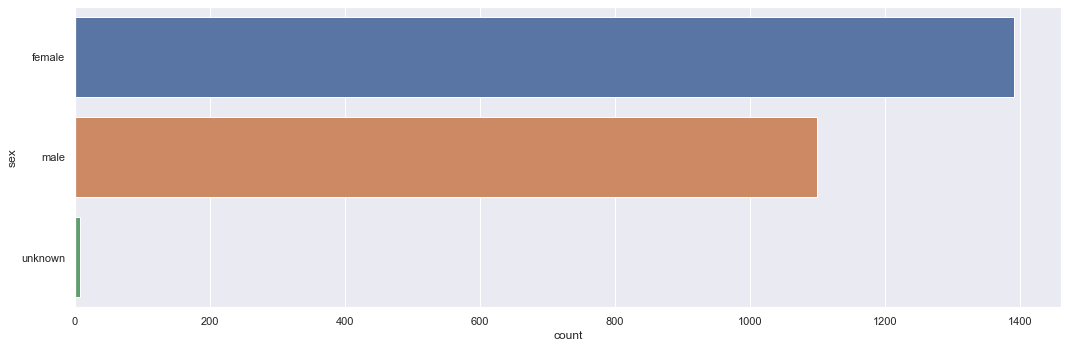

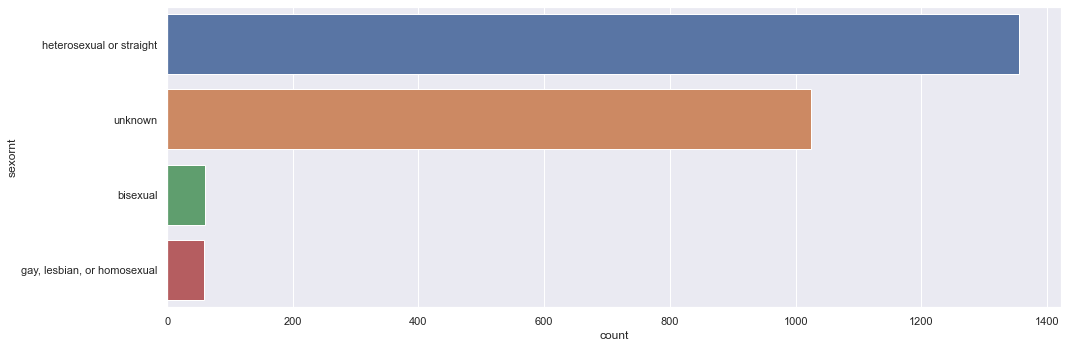

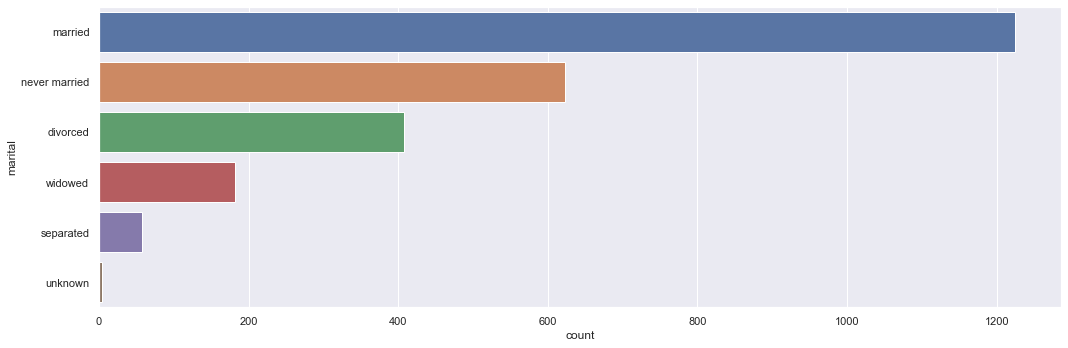

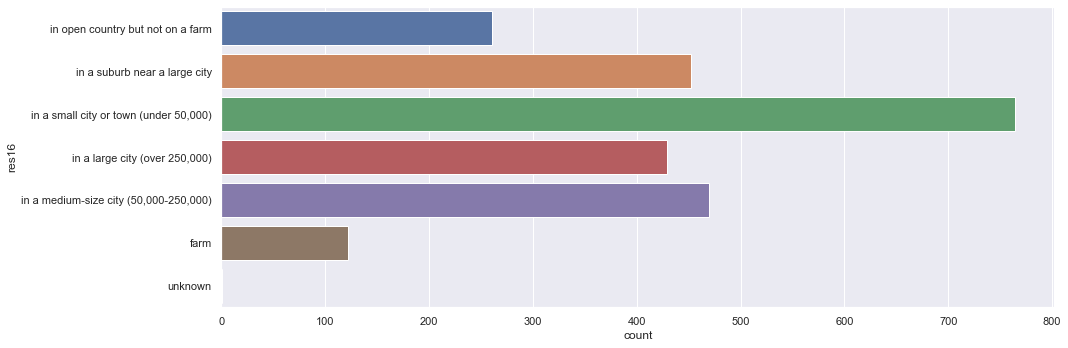

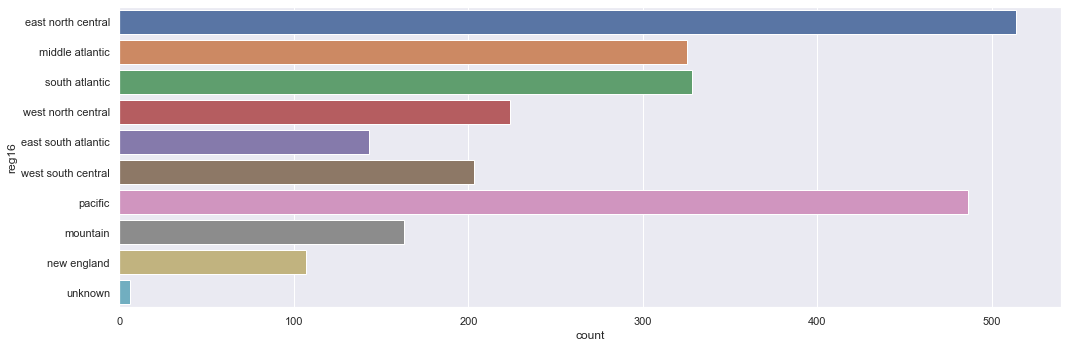

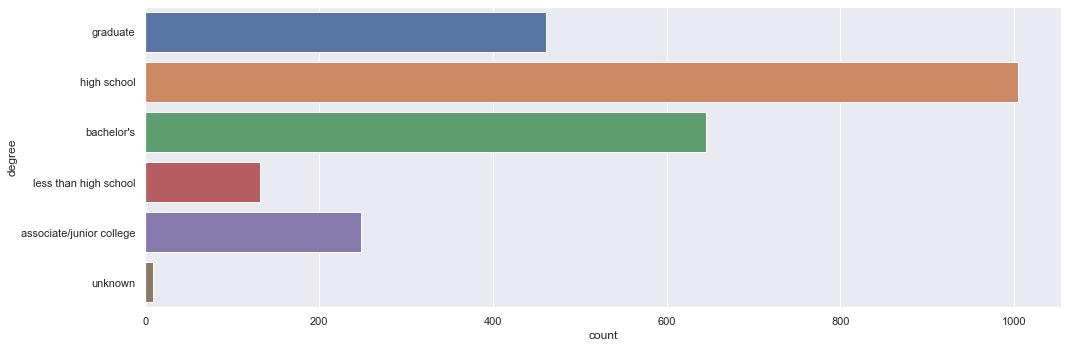

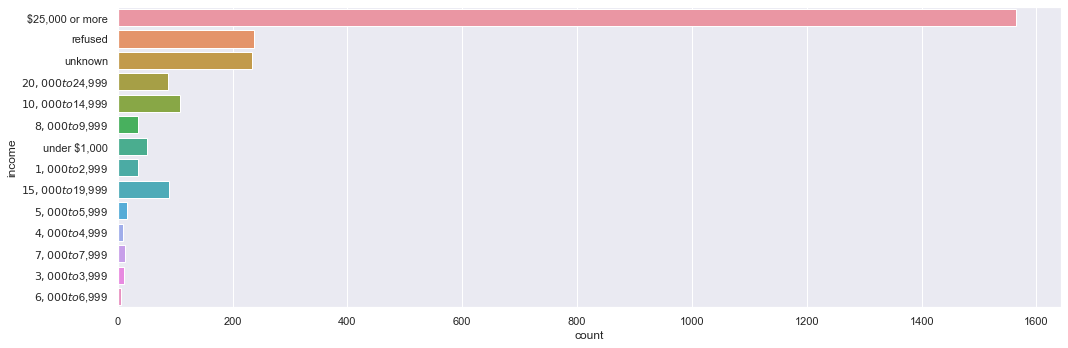

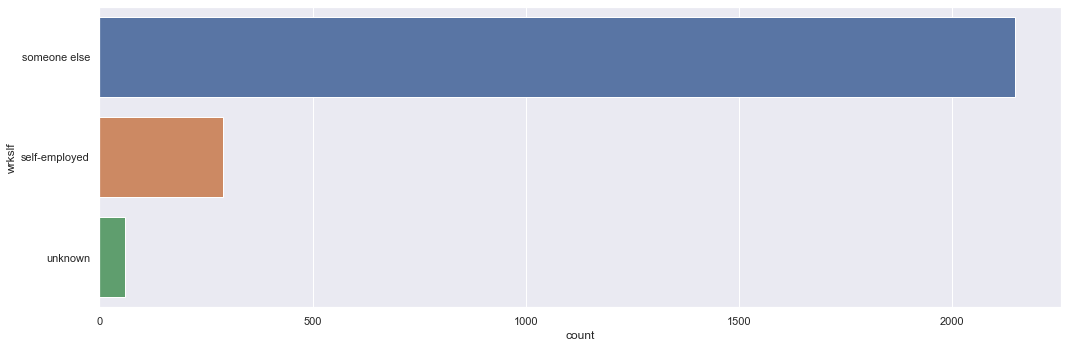

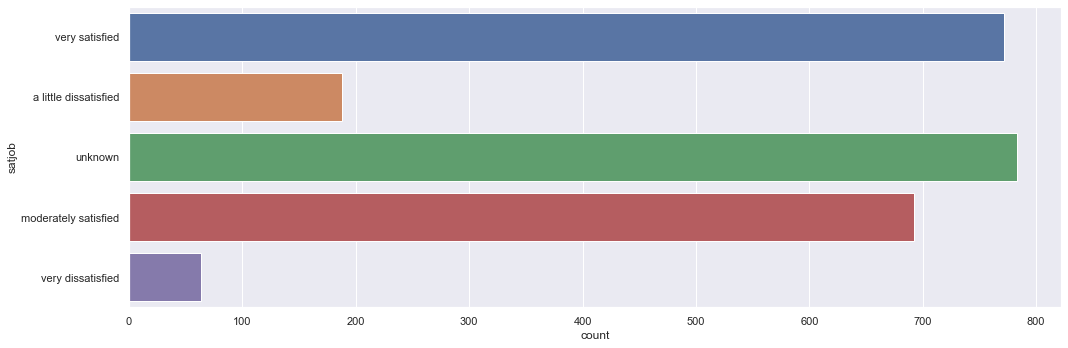

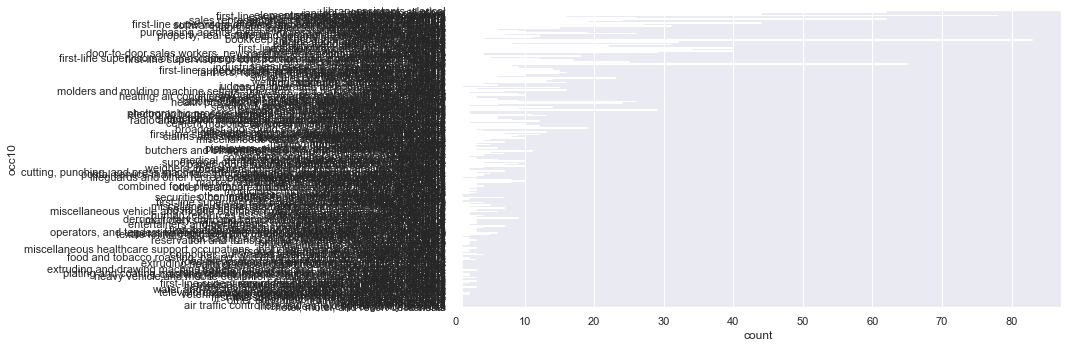

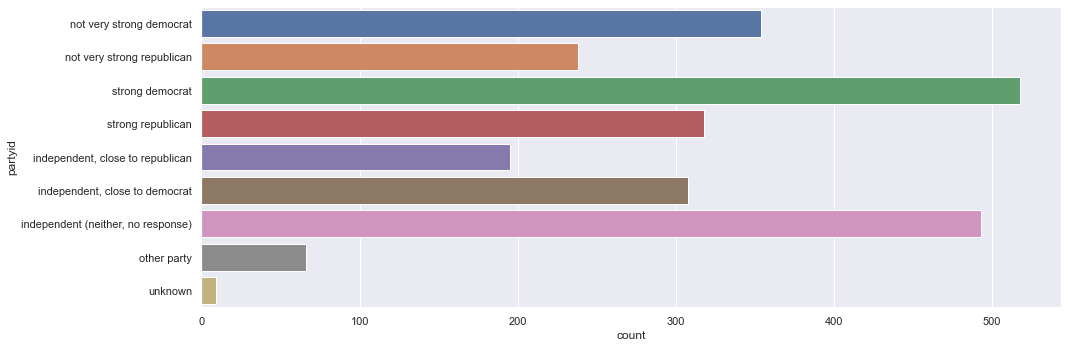

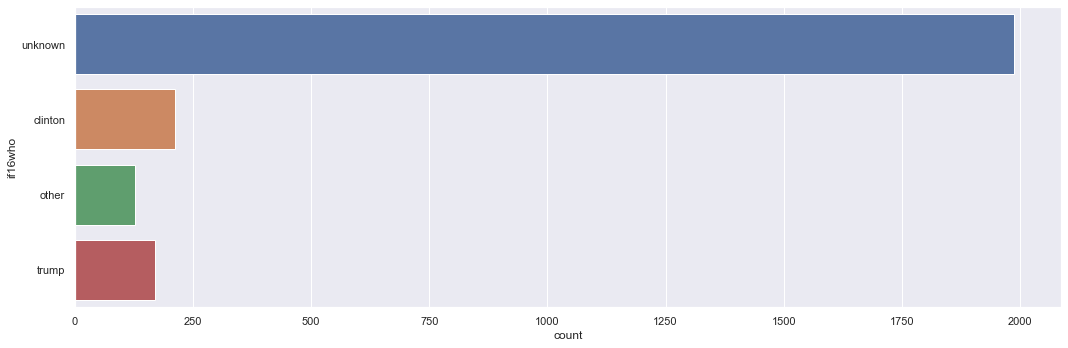

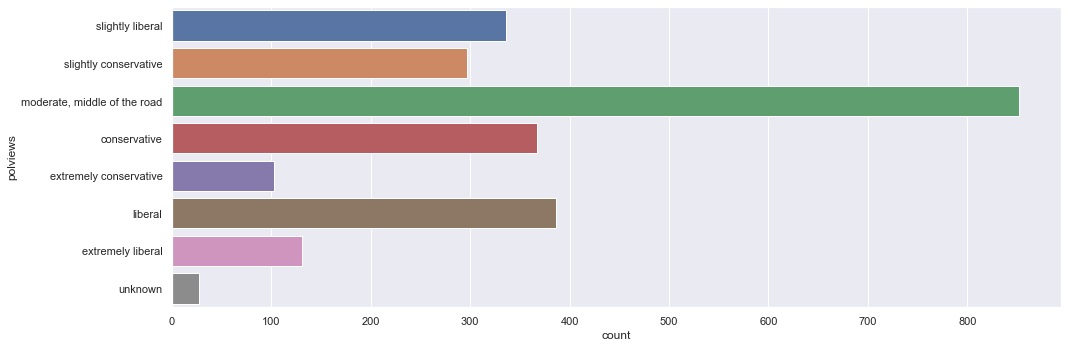

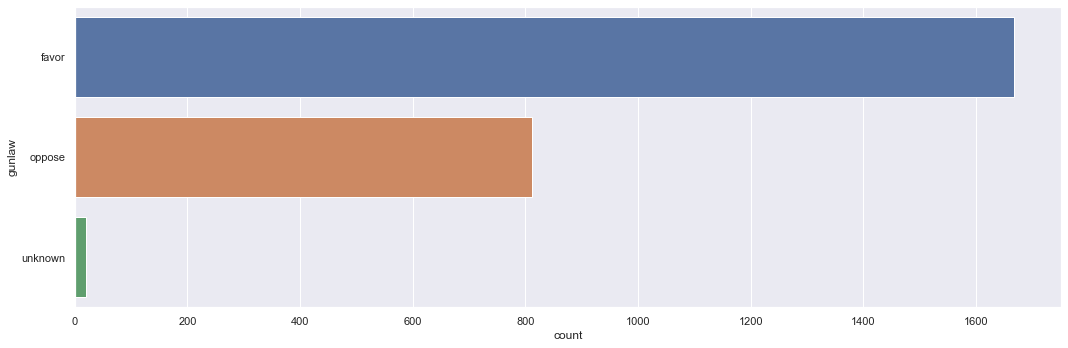

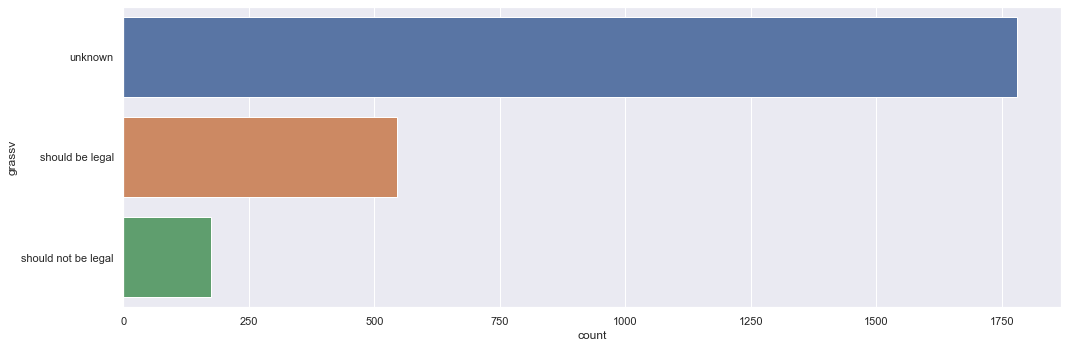

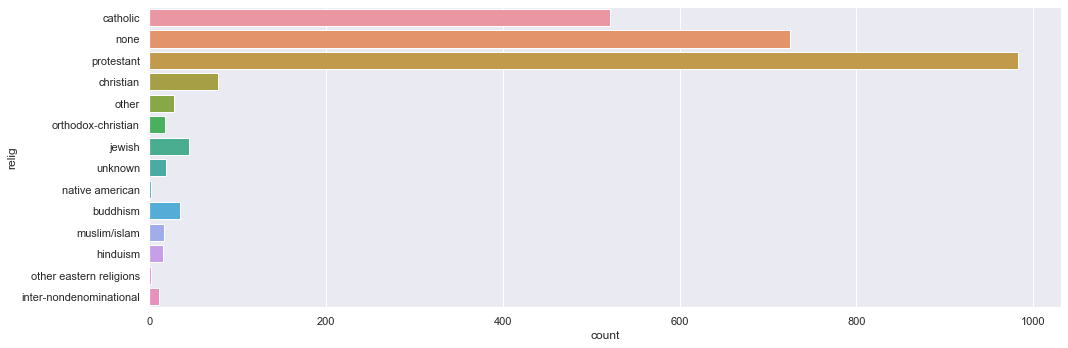

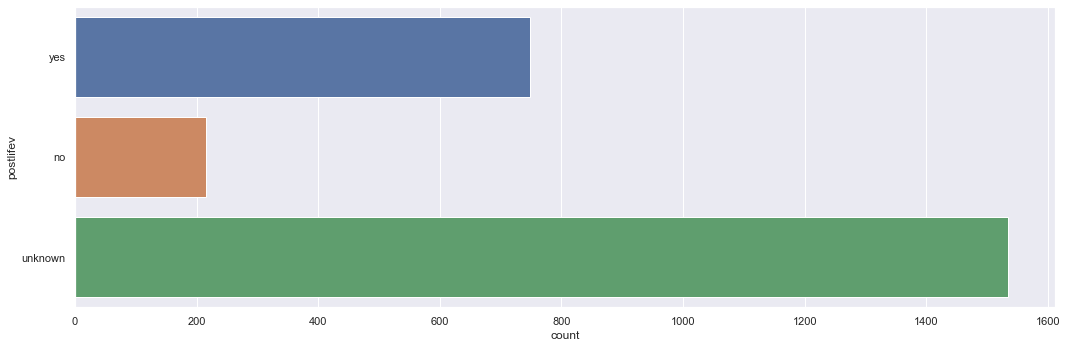

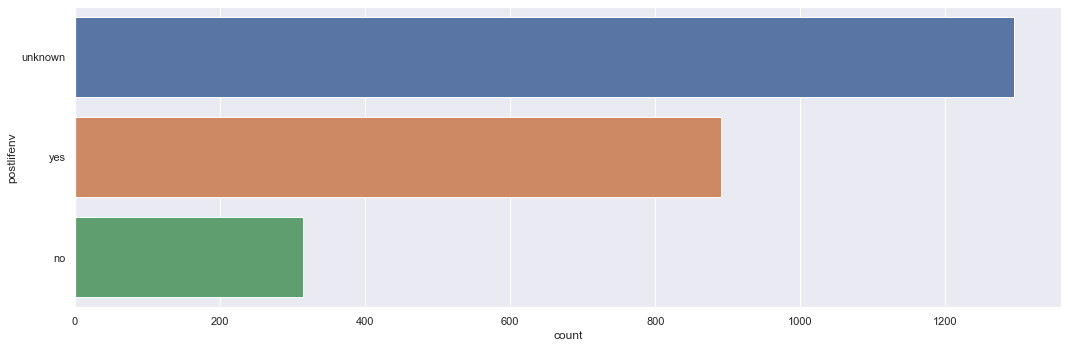

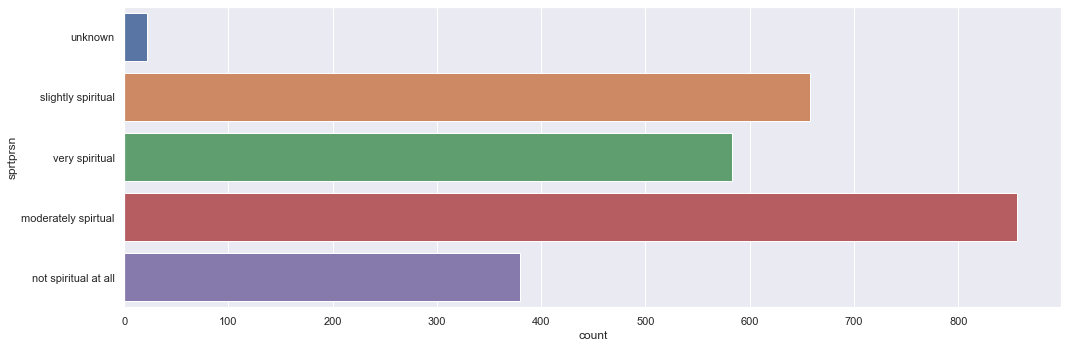

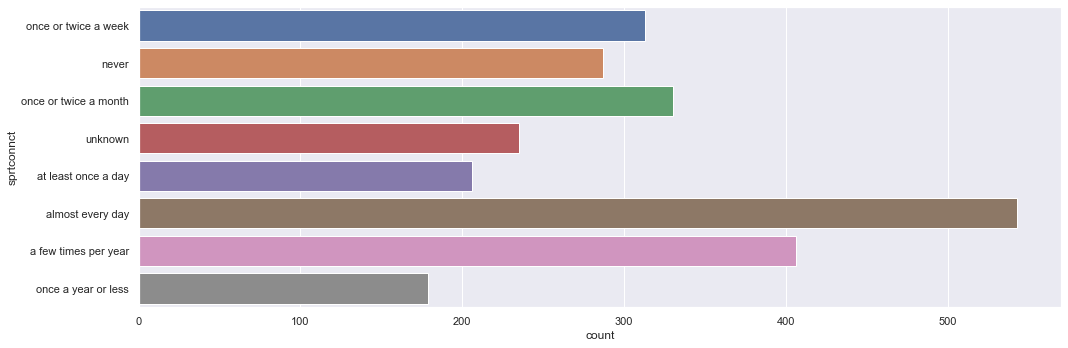

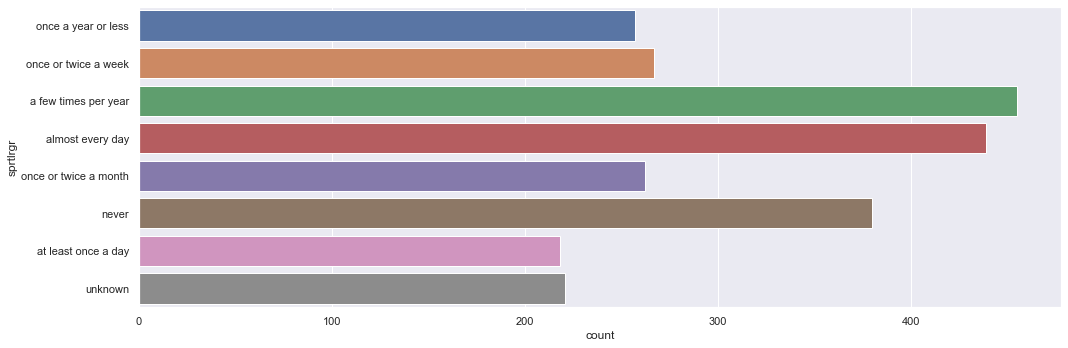

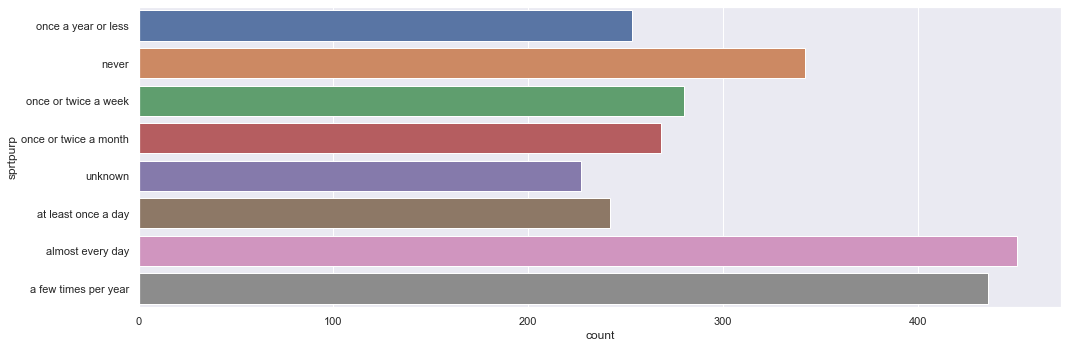

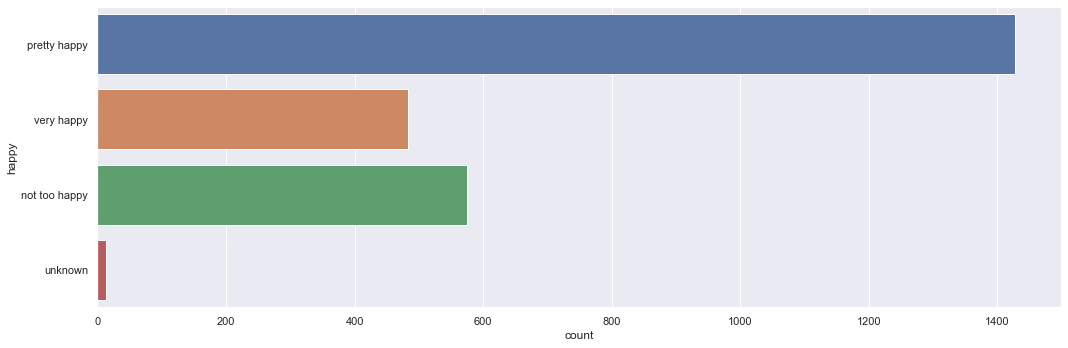

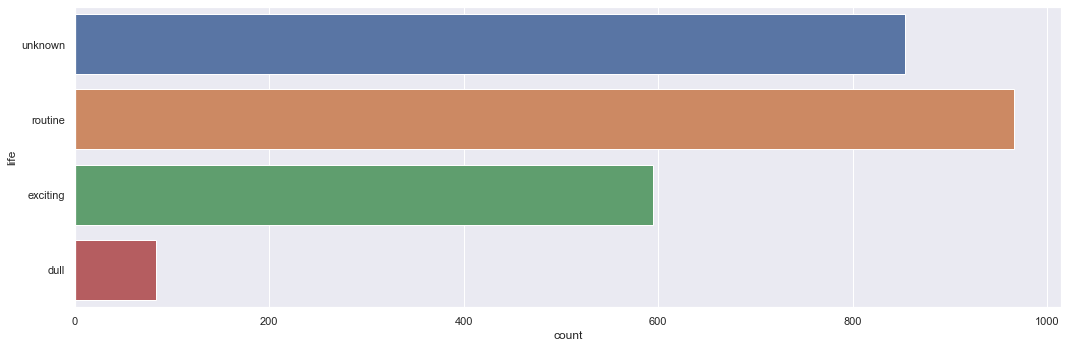

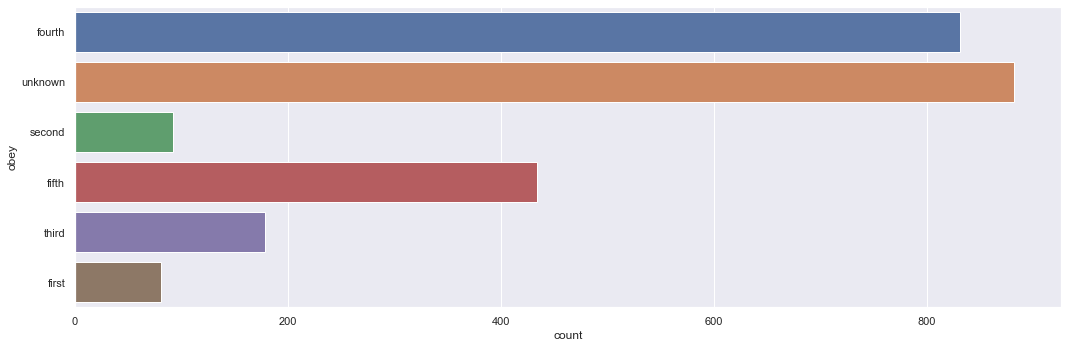

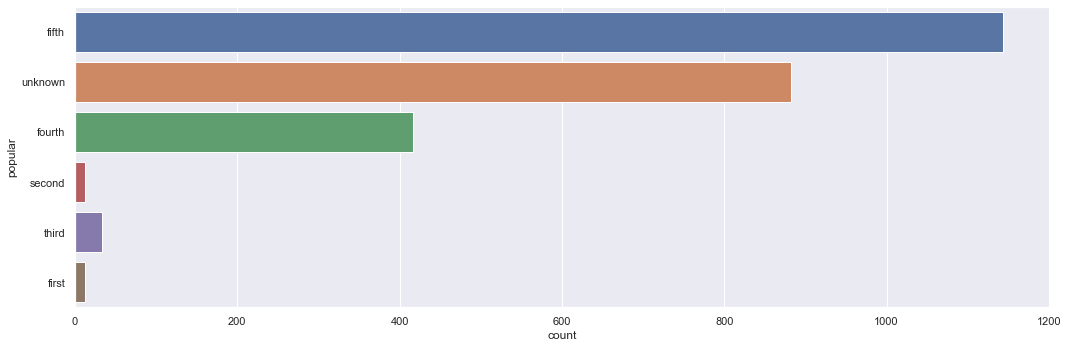

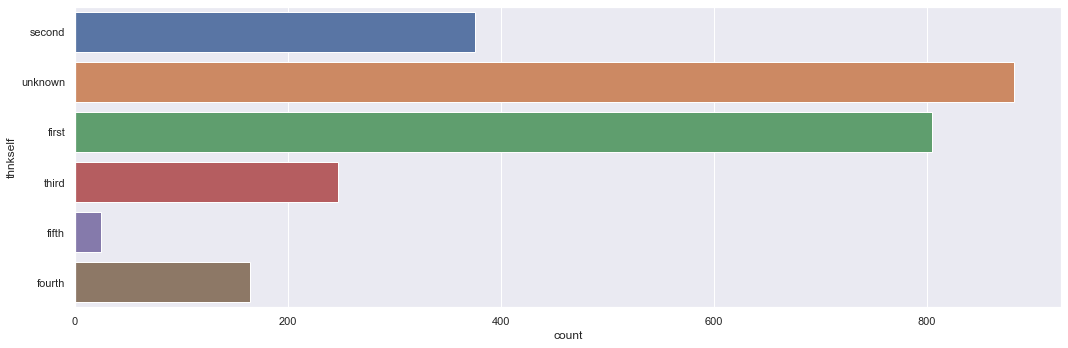

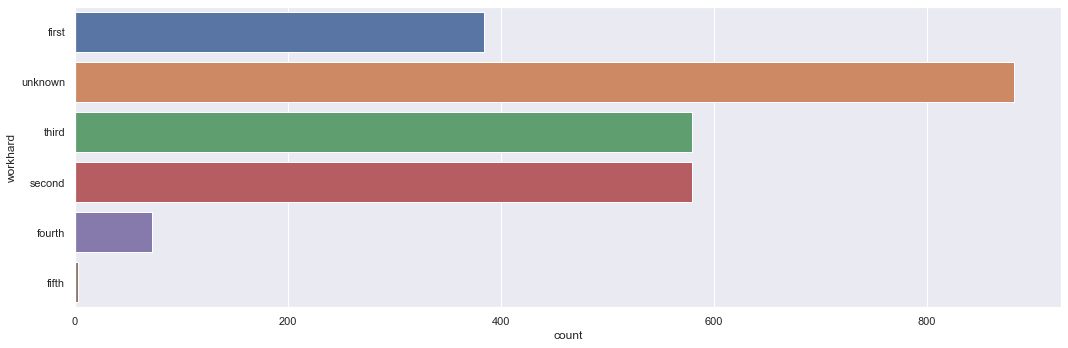

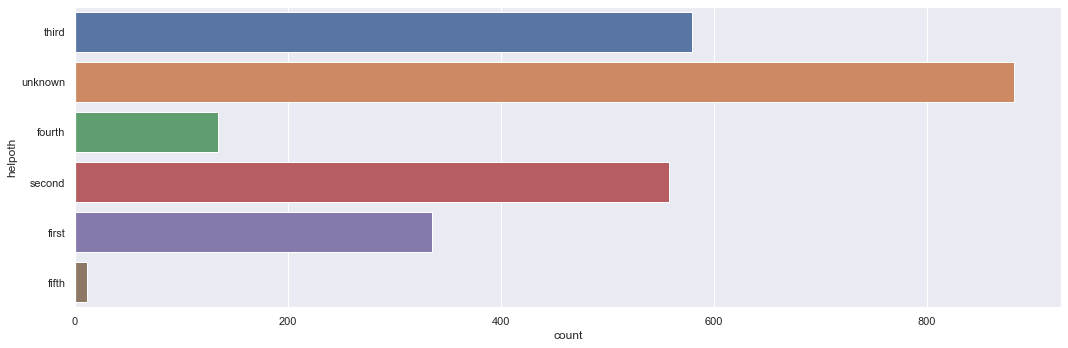

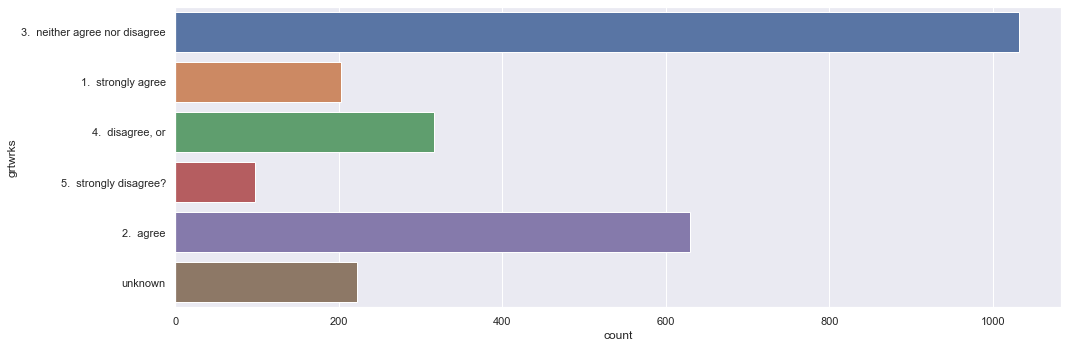

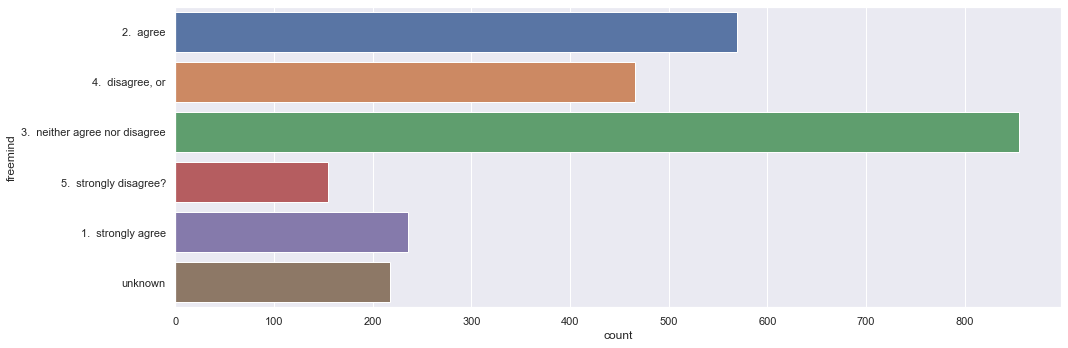

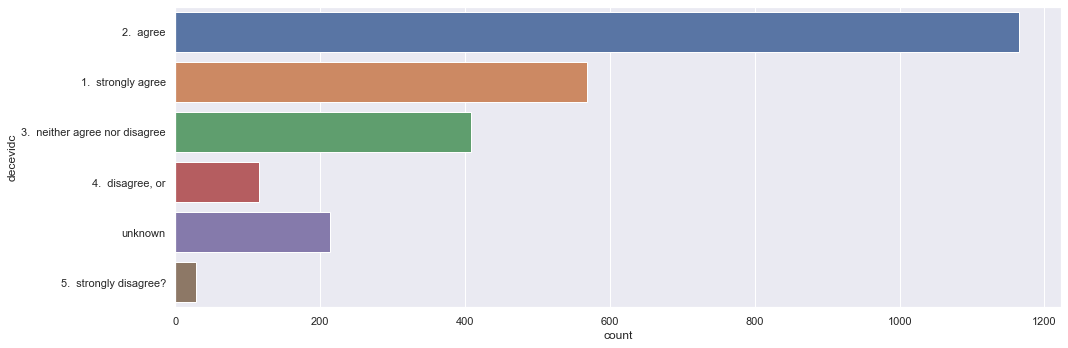

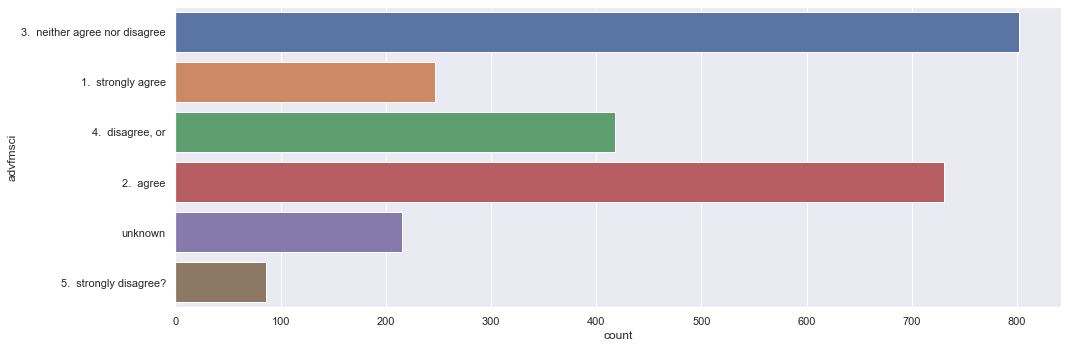

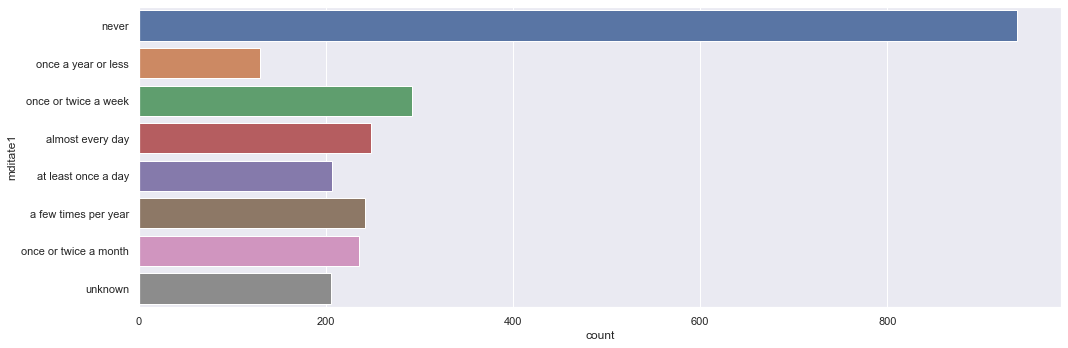

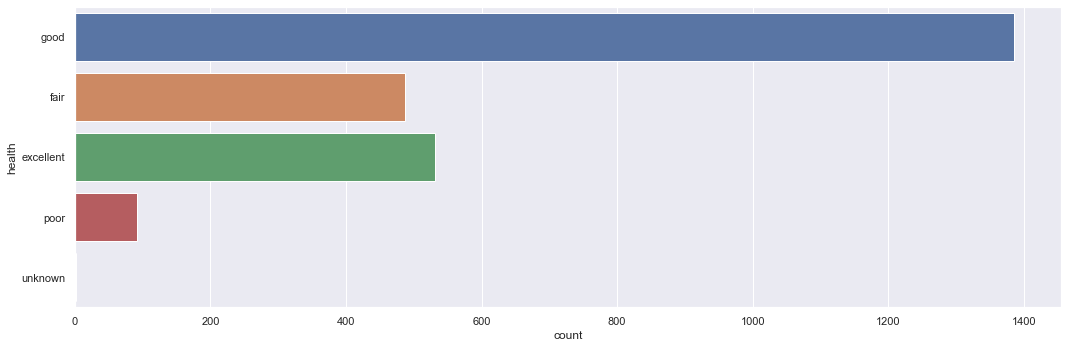

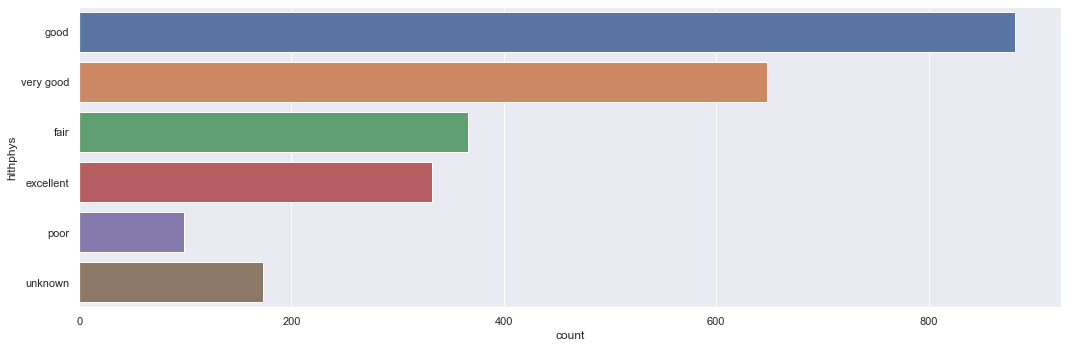

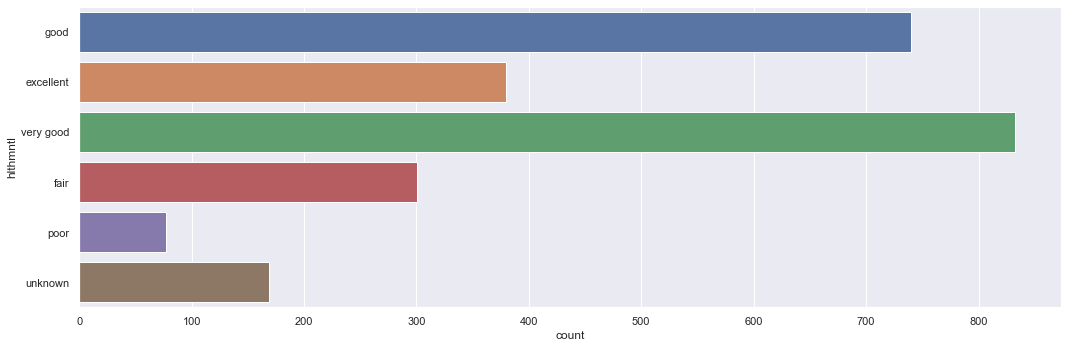

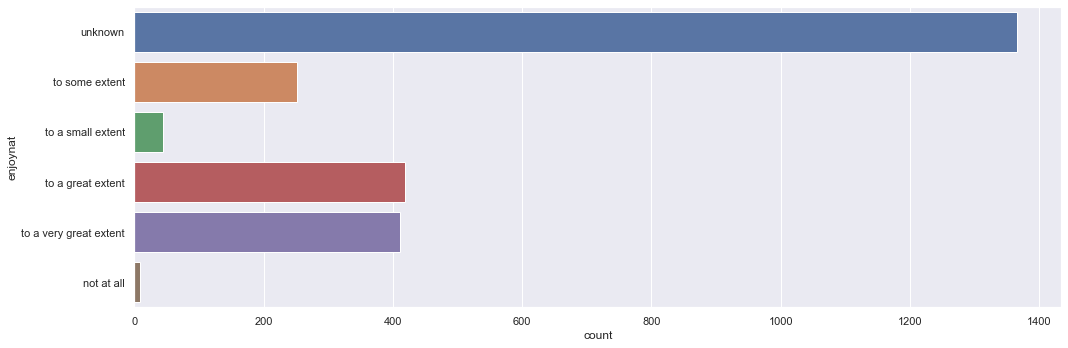

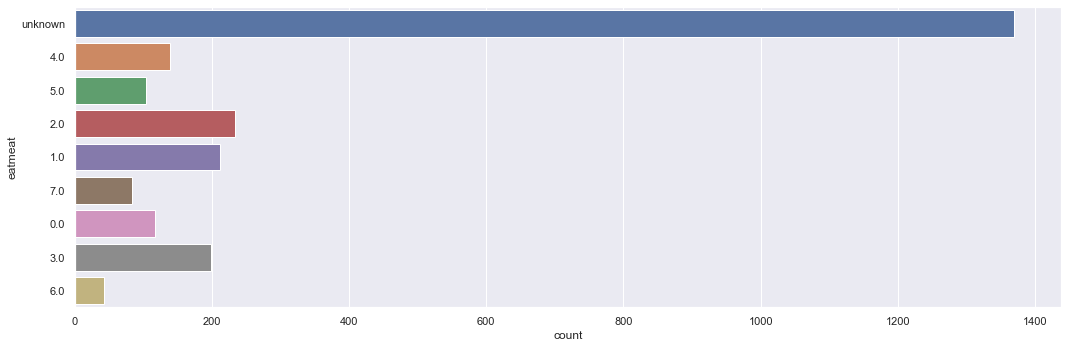

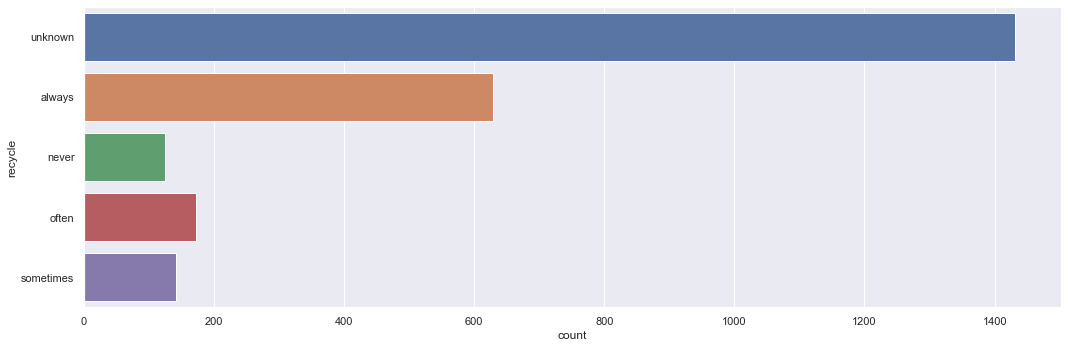

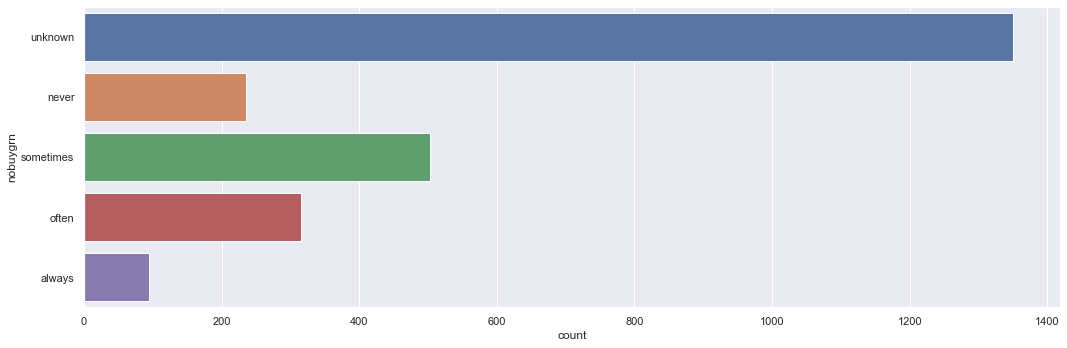

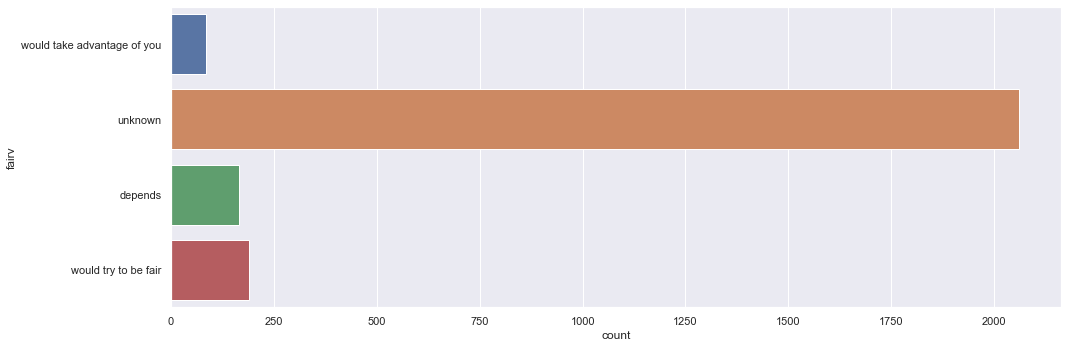

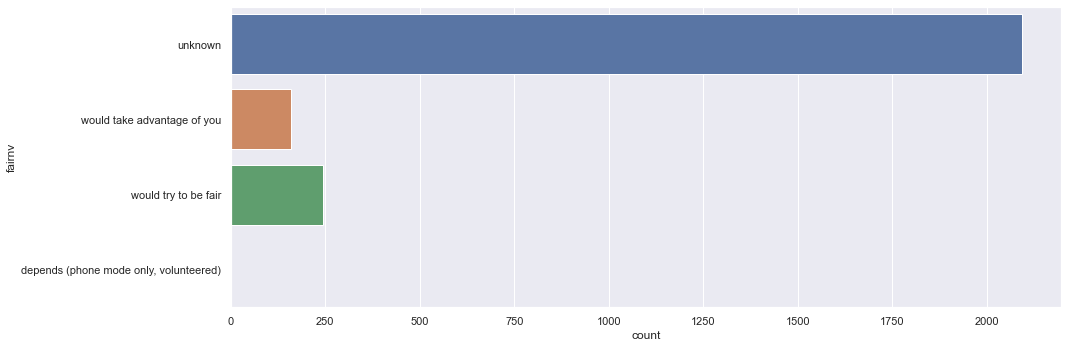

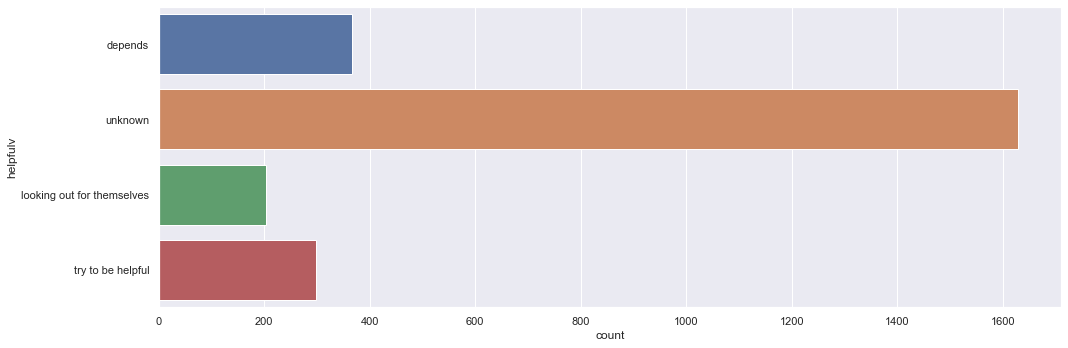

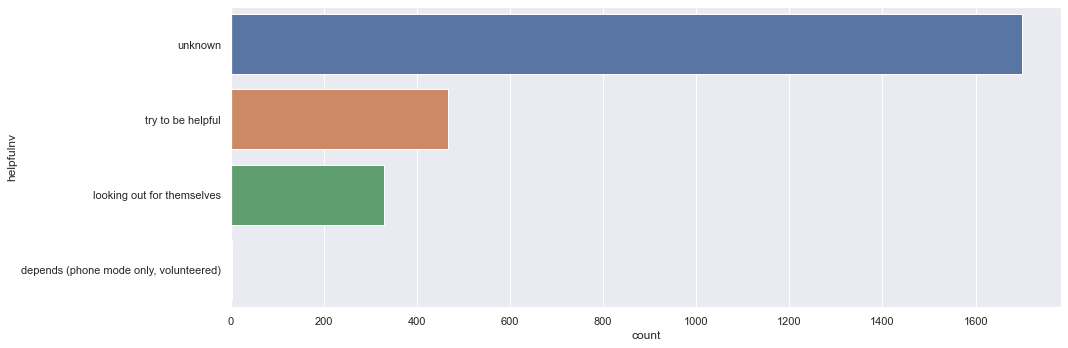

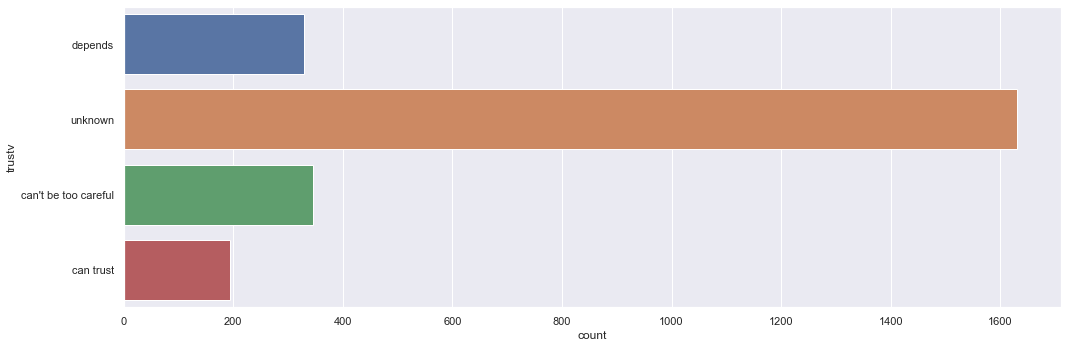

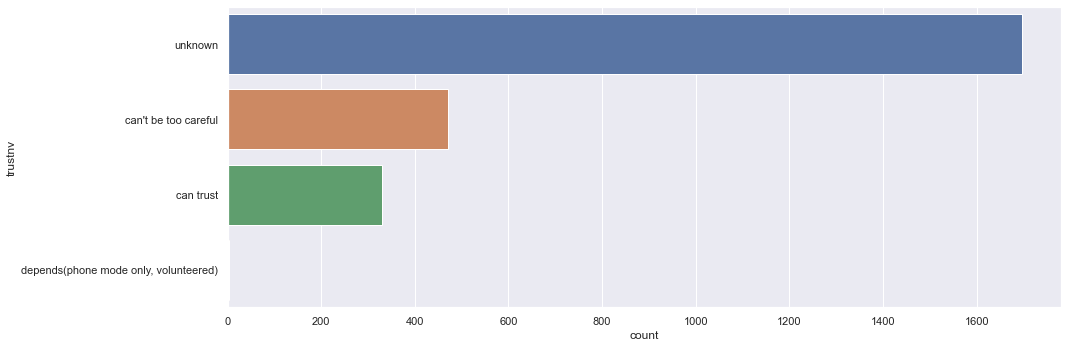

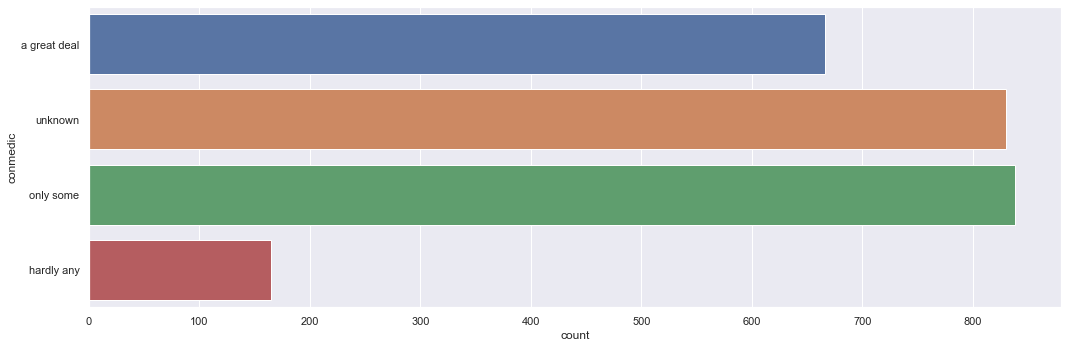

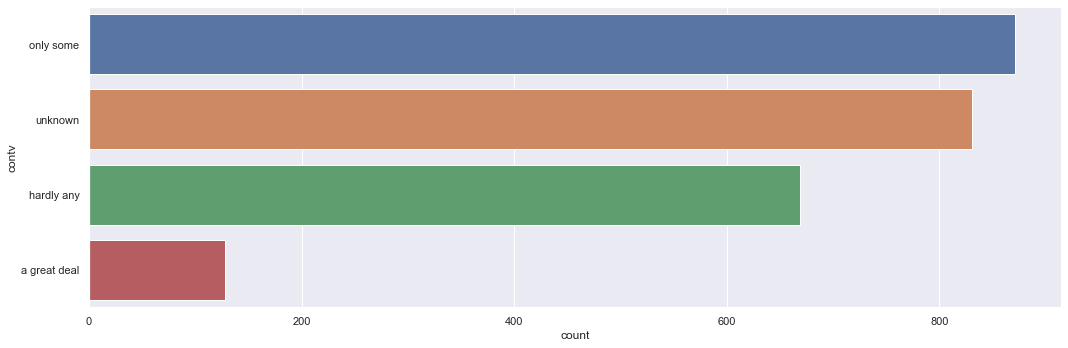

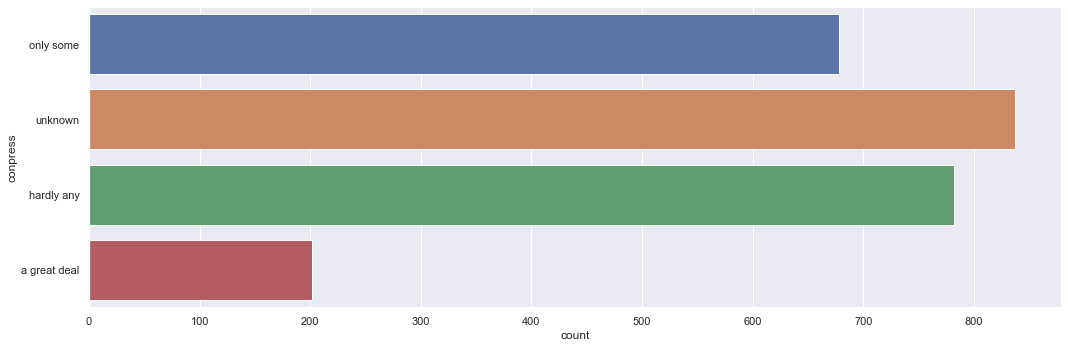

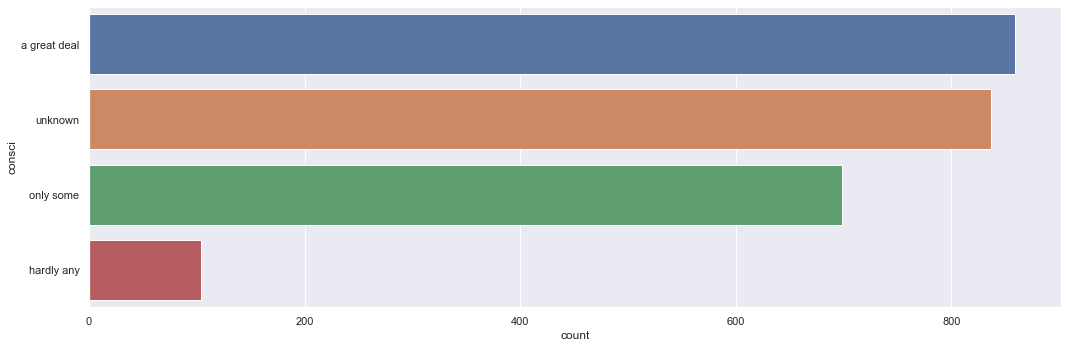

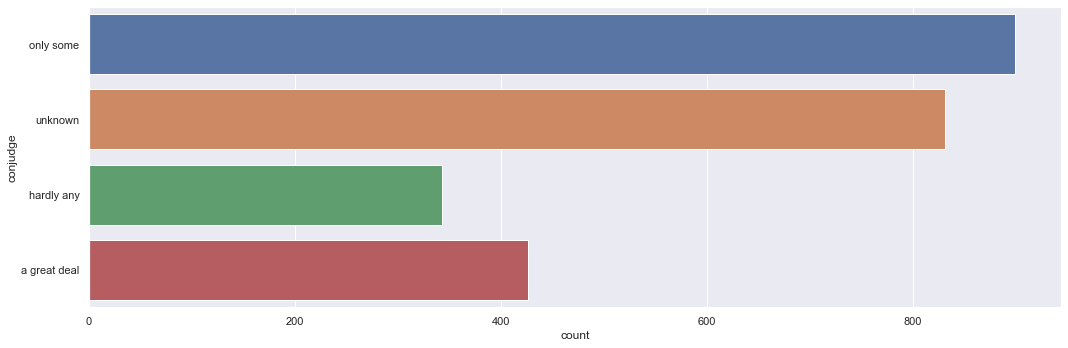

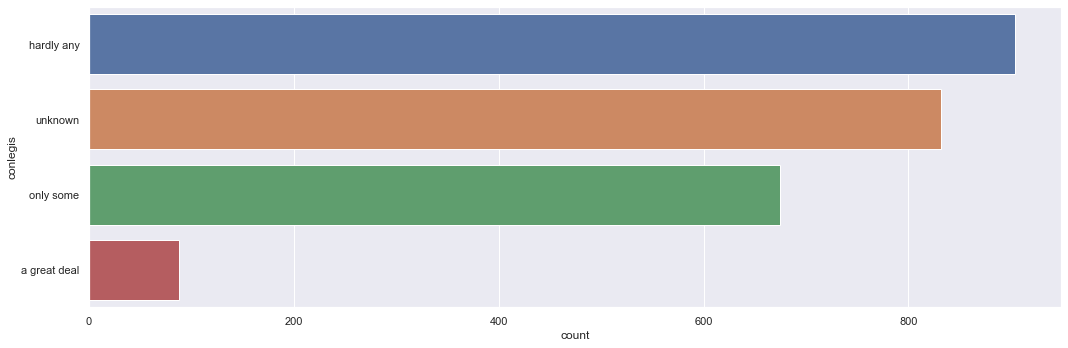

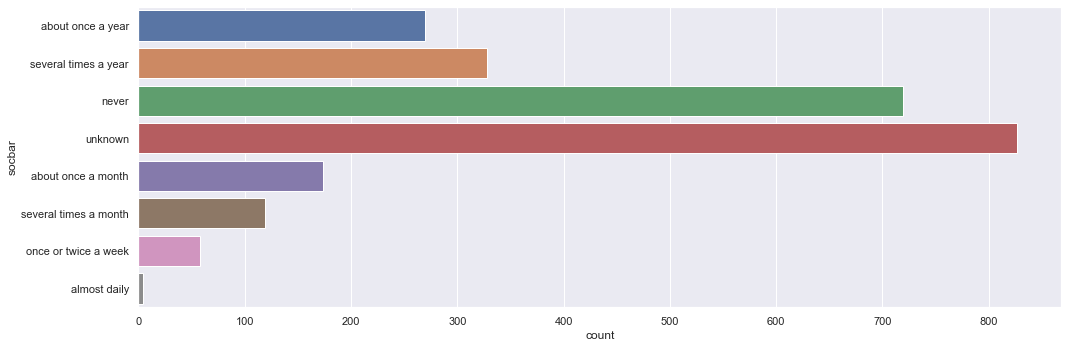

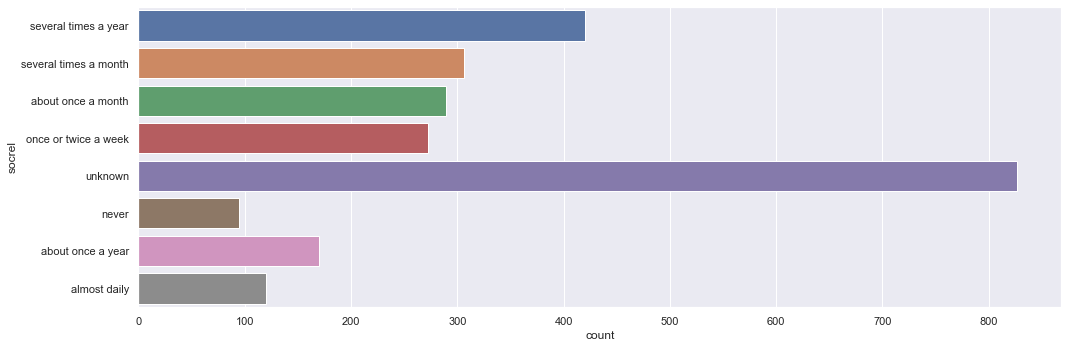

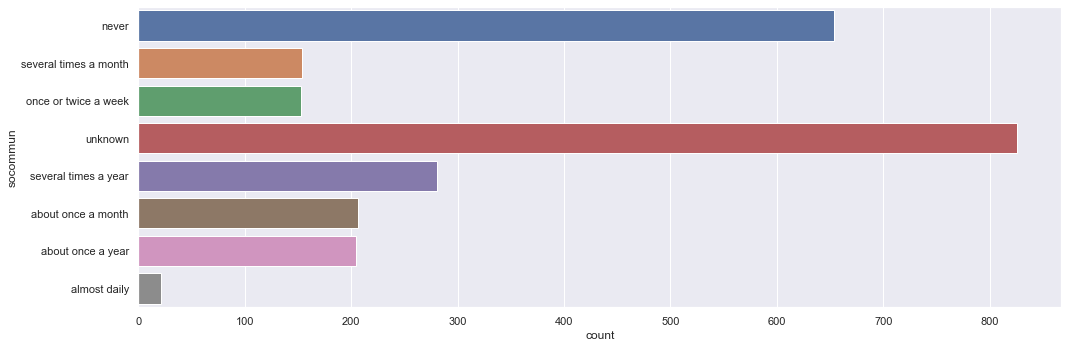

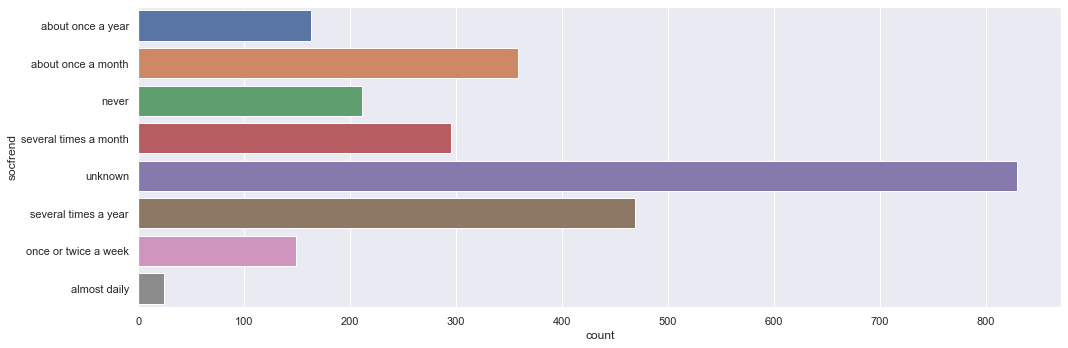

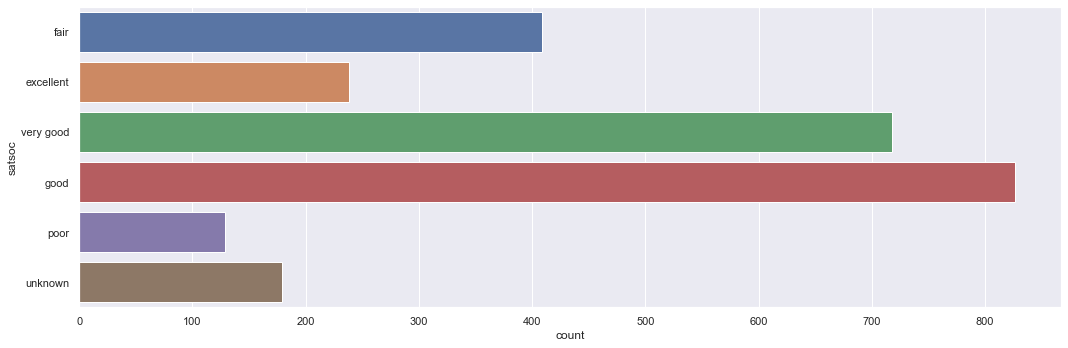

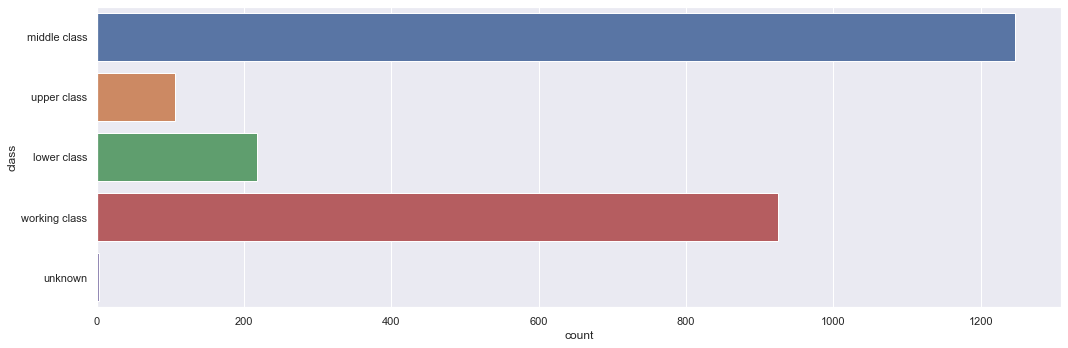

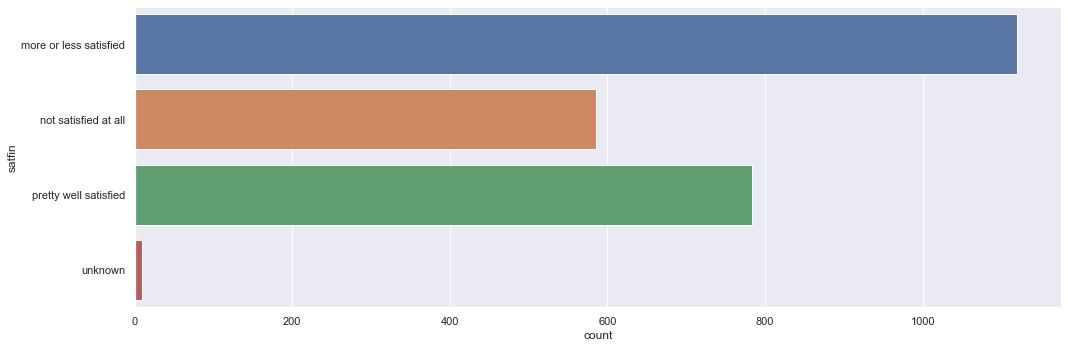

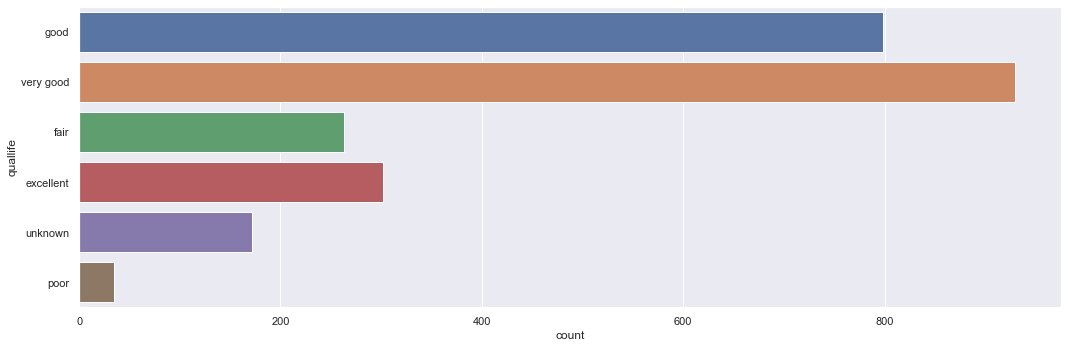

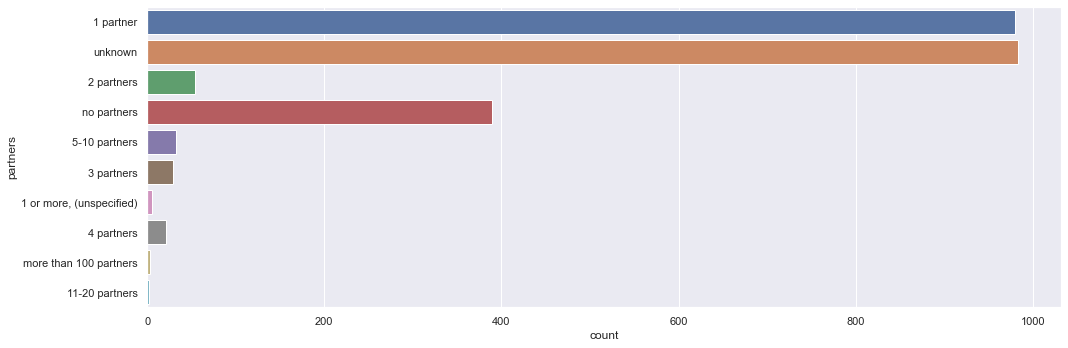

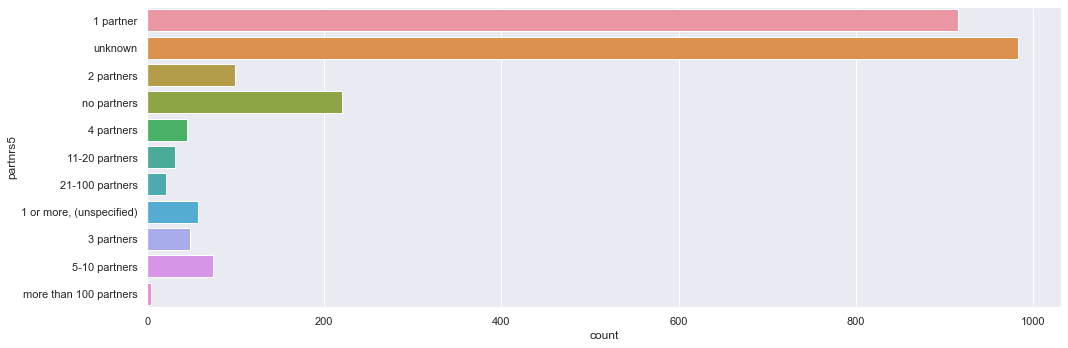

In [8]:
viz.variable_count(train)

### Things noticed:
- I realized age needed to be further binned, to use in later exploration.
- I also wanted to add a column that gave the birthdate ranges of each zodiac.
- I encoded the columns sex, race, degree and class to explore on demographics

In [9]:
#binning ages, and encoding columns here:
train = explore.prep_df(train)

In [10]:
#running train through functions to add new column for zodiac dates:
def zodiac_dates(row):  
    if row['zodiac'] == 'libra':
        return 'Sept 22-Oct 23'
    elif row['zodiac'] == 'aries':
        return 'March 21-April 19'
    elif row['zodiac'] == 'taurus':
        return 'April 20-May 20'
    elif row['zodiac'] == 'gemini':
        return 'May 21-June 21'
    elif row['zodiac'] == 'cancer':
        return 'June 22-July 22'
    elif row['zodiac'] == 'leo':
        return 'July 23-Aug 22'
    elif row['zodiac'] == 'virgo':
        return 'Aug 23-Sept 22'
    elif row['zodiac'] == 'scorpio':
        return 'Oct 23-Nov 21'
    elif row['zodiac'] == 'sagittarius':
        return 'Nov 22-Dec 21'
    elif row['zodiac'] == 'capricorn':
        return 'Dec 22-Jan 19'
    elif row['zodiac'] == 'aquarius':
        return 'Jan 20-Feb 18'
    return 'Feb 19-March 20'


In [11]:
#showing that zodiac date ranges have been added at end of dataframe and columns encoded
train.head(3)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,zodiac_cancer,zodiac_capricorn,zodiac_gemini,zodiac_leo,zodiac_libra,zodiac_pisces,zodiac_sagittarius,zodiac_scorpio,zodiac_taurus,zodiac_virgo
238,libra,white,"(36.0, 45.0]",female,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,0,0,0,0,1,0,0,0,0,0
342,libra,white,"(45.0, 54.0]",male,unknown,married,in a suburb near a large city,middle atlantic,graduate,refused,...,0,0,0,0,1,0,0,0,0,0
786,sagittarius,black,"(45.0, 54.0]",female,heterosexual or straight,never married,"in a small city or town (under 50,000)",south atlantic,high school,unknown,...,0,0,0,0,0,0,1,0,0,0


<a href='#quick_links'>Back to Quick Links</a>

_______________________________________________________________

# Hypothesis Testing:<a name='Hypothesis Testing'></a>
> ## Quick Notes
#### <mark>Bivariate chi-square tests was put to each variable in relation to zodiac</mark>. Below are the main drivers found that rejected null Hypothesis. Main questions and procedures follow.
<div class="alert alert-info">Main drivers found:<br>
    - <b>workhard</b>: Survey question<i> "If you had to choose, which thing on this list would you pick as the most important for a child to learn to prepare him or her for life?</i> [Choice to Workhard]<br>
    - <b>hltmntl</b>: Survey question<i> "In general, how would you rate your mental health, including your mood and your ability to think?"</i><br>
    - <b>socrel</b>: Survey question<i> "How often do you spend a social evening with relatives?"</i><br>
    - <b>decevidc</b>: Survey question<i> "When I make important decisions in my life, I rely mostly on reason and evidence."</i><br></div>

<a href='#quick_links'>Back to Quick Links</a>

### Due to the large amount of hypothesis tests that were conducted (all 66 columns!), I'll focus on just a few that rejected null and became main drivers for models, and also some that I found interesting that failed to reject null.

#### <div class="alert alert-warning"><u>Astrology research note</u>: Relationship and maritial status always seem to be brought up in zodiac & astrology readings. I thought that perhaps this could help classify one's sign. After speaking with a contact that has more knowledge of astrology that myself, she had verified that when it comes to astrology, there are different signs in a person's birthchart that would actually predict signs better rather than sun sign. However, to continue with an MVP model of trying to beat a baseline of zodiac prediction, I tried below, just to see the outcomes.</div>

### Hypothesis 1: Relationship/marital status can help classify a person's zodiac.

- H_0: Marital status is independant of zodiac sign.
- H_a: Marital status is dependant of zodiac sign.
- alpha = 0.05

In [12]:
#stats test on marital status and zodiac:
viz.chi_square_test(train.marital, train.zodiac)

,χ^2,p,reject_null
0,46.408738,0.78863,False


#### This variable failed to reject the null hypothesis, so other areas and questions were moved onto find drivers.

____________________________________________________________
### Hypothesis 2: Opinions on working hard in life can help classify a person's zodiac.

- H_0: workhard opinion is independant of zodiac sign.
- H_a: workhard opinion is dependant of zodiac sign.
- alpha = 0.05

In [13]:
#stats test on marital status and zodiac:
viz.chi_square_test(train.workhard, train.zodiac)

,χ^2,p,reject_null
0,82.108358,0.010364,True


#### This variable rejected the null hypothesis, and was added to the list of main drivers to later build models with.

____________________________________________________________
### Hypothesis 3: Political viewpoints can help classify a person's zodiac.

- H_0: Political viewpoints is independant of zodiac sign.
- H_a: Political viewpoints is dependant of zodiac sign.
- alpha = 0.05

In [14]:
#stats test on marital status and zodiac:
viz.chi_square_test(train.polviews, train.zodiac)

,χ^2,p,reject_null
0,96.607851,0.064812,False


#### This variable failed to reject the null hypothesis, so other areas and questions were moved onto find drivers.

____________________________________________________________
### Hypothesis 4: Self ratings of mental health can help classify a person's zodiac.

- H_0: Self ratings of mental health is independant of zodiac sign.
- H_a: Self ratings of mental health is dependant of zodiac sign.
- alpha = 0.05

In [15]:
#stats test on marital status and zodiac:
viz.chi_square_test(train.hlthmntl, train.zodiac)

,χ^2,p,reject_null
0,77.085523,0.026343,True


#### This variable rejected the null hypothesis, and was added to the list of main drivers to later build models with.

____________________________________________________________
### Hypothesis 5: How often one spends time with family can help classify a person's zodiac.

- H_0: Time with family is independant of zodiac sign.
- H_a: Time with family is dependant of zodiac sign.
- alpha = 0.05

In [16]:
#stats test on marital status and zodiac:
viz.chi_square_test(train.socrel, train.zodiac)

,χ^2,p,reject_null
0,107.184749,0.013072,True


#### This variable rejected the null hypothesis, and was added to the list of main drivers to later build models with.

____________________________________________________________
### Hypothesis 6: Need of reason and evidence for decisions can help classify a person's zodiac.

- H_0: Need of reason and evidence for decisions is independant of zodiac sign.
- H_a: Need of reason and evidence for decisions is dependant of zodiac sign.
- alpha = 0.05

In [17]:
#stats test on marital status and zodiac:
viz.chi_square_test(train.decevidc, train.zodiac)

,χ^2,p,reject_null
0,74.935249,0.038203,True


#### This variable rejected the null hypothesis, and was added to the list of main drivers to later build models with.

<div class="alert alert-warning">Note: I also asked the astrology contact if the above survey questions related to what they might also ask a person in determining their Sun sign. They verified that hypothesis 2, 6 and possibly 4 could be helpful. Overall happiness might be one too.</div>

____________________________________________________________
### Hypothesis 7: The overall happiness one feels can help classify a person's zodiac.

- H_0: Overall happiness is independant of zodiac sign.
- H_a: Overall happiness is dependant of zodiac sign.
- alpha = 0.05

In [18]:
#stats test on marital status and zodiac:
viz.chi_square_test(train.happy, train.zodiac)

,χ^2,p,reject_null
0,36.298932,0.317466,False


#### This variable failed to reject the null hypothesis, so other areas and questions were moved onto find drivers.

<a href='#quick_links'>Back to Quick Links</a>

<a name='Astrology Fun'></a>
># <div class="alert alert-warning">Some Astrology fun: Taking a deeper look at Statistics and the Zodiac Signs
I broke down and created subvariables for the hypothesis testing (with help from fellow ds friend, Stephen Fitzsimon). You can look at the rundown of each variable and relation in the chi^2 stats test dependant on your own zodiac sign and if there is a statistically significant factor in those answers or not. Some examples are below:</div>


#### Run down of Marital stats tests and some visualizations:

<div class="alert alert-warning">Interesting finds:
- The Libras in this survey tended to have a higher prediction of being married.<br>
- Cancer signs tended to fall under the 'unknown' columns of answering/not answering or possibly "it's complicated".</div>

In [19]:
#looking at subcategories
explore.chi_square_mass_test(train, cat_cols=['marital'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,marital,libra,married,libra independent of married,3.892673,0.048497,True
1,zodiac,marital,sagittarius,married,sagittarius independent of married,0.876101,0.349272,False
2,zodiac,marital,virgo,married,virgo independent of married,0.241458,0.623155,False
3,zodiac,marital,scorpio,married,scorpio independent of married,0.014570,0.903924,False
4,zodiac,marital,pisces,married,pisces independent of married,1.320848,0.250440,False
...,...,...,...,...,...,...,...,...
67,zodiac,marital,capricorn,unknown,capricorn independent of unknown,0.000000,1.000000,False
68,zodiac,marital,leo,unknown,leo independent of unknown,0.000000,1.000000,False
69,zodiac,marital,aquarius,unknown,aquarius independent of unknown,0.000000,1.000000,False
70,zodiac,marital,gemini,unknown,gemini independent of unknown,0.000000,1.000000,False


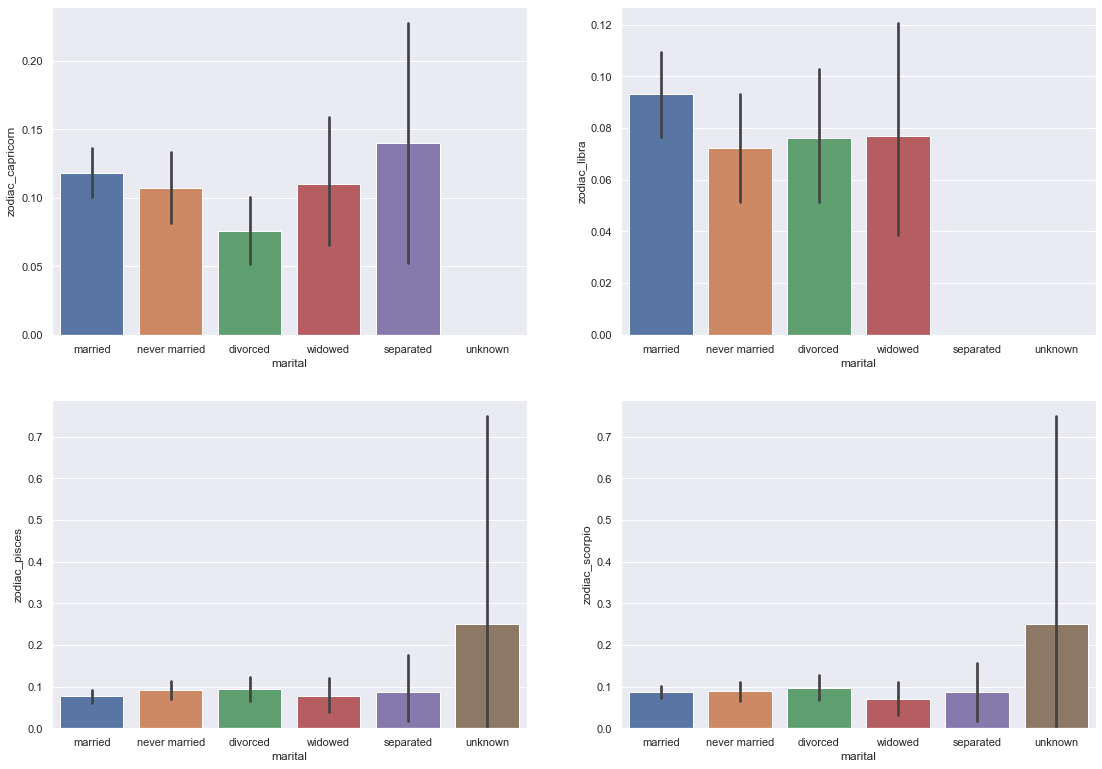

In [20]:
viz.mar_viz(train)

#### Run down of political views stats tests and some visualizations:

<div class="alert alert-warning">Take aways here:
- It was interesting to actually find some real groupings of political viewpoints here, despite the chi^2 test failing to reject null. This made me consider possibly building onto this model and add in cluster and feature engineering.</div>

In [21]:
#looking at polviews
explore.chi_square_mass_test(train, cat_cols=['polviews'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,polviews,libra,slightly liberal,libra independent of slightly liberal,1.179643,0.277429,False
1,zodiac,polviews,sagittarius,slightly liberal,sagittarius independent of slightly liberal,2.758342,0.096748,False
2,zodiac,polviews,virgo,slightly liberal,virgo independent of slightly liberal,0.000000,1.000000,False
3,zodiac,polviews,scorpio,slightly liberal,scorpio independent of slightly liberal,2.074511,0.149778,False
4,zodiac,polviews,pisces,slightly liberal,pisces independent of slightly liberal,6.897722,0.008631,True
...,...,...,...,...,...,...,...,...
91,zodiac,polviews,capricorn,unknown,capricorn independent of unknown,2.561850,0.109470,False
92,zodiac,polviews,leo,unknown,leo independent of unknown,0.023503,0.878155,False
93,zodiac,polviews,aquarius,unknown,aquarius independent of unknown,0.396084,0.529119,False
94,zodiac,polviews,gemini,unknown,gemini independent of unknown,0.150794,0.697778,False


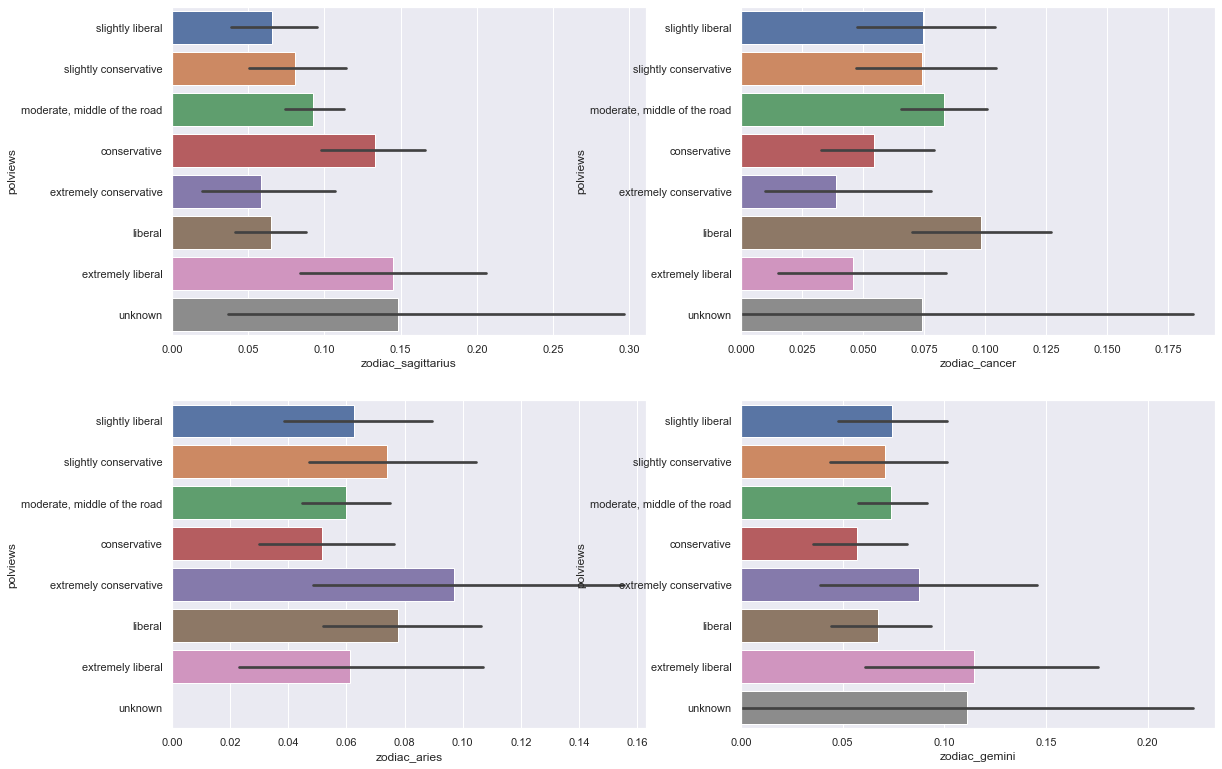

In [22]:
viz.pol_viz(train)

_____________________________________________________

#### Run down of religion and the zodiacs of participants with some visualizations:

<div class="alert alert-warning">Take aways here:
- Even though the highest value_count of respondants in this survery were protestant, there were some interesting groupings of zodiac to religious affiliation here. </div>

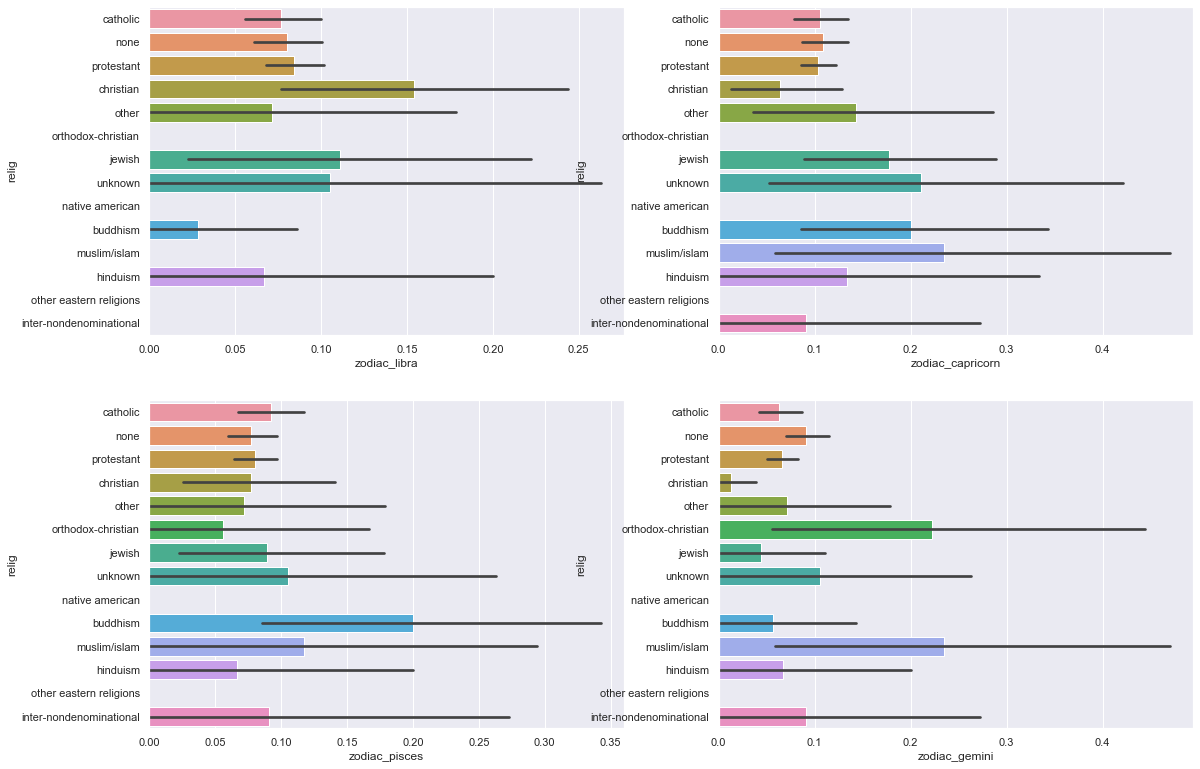

In [23]:
#plot showing religion value_counts of a sample of zodiac signs of participants:
viz.reg_viz(train)

<a href='#quick_links'>Back to Quick Links</a>

_______________________________________________

## Visualizations of the drivers:<a name='Driver Viz'></a>

Using bivariate exploration, here are some charts to get an idea of what the statistics and visualizations of these drivers were occuring.

 ### Driver survey responses 1) 
 <i>"If you had to choose, which thing on this list would you pick as the most important for a child to learn to prepare him or her for life? [This column was the choice of teaching child to Workhard]</i>

In [24]:
#chi_square test of all zodiacs to this driver question
explore.chi_square_mass_test(train, cat_cols=['workhard'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,workhard,libra,first,libra independent of first,4.230954,0.039693,True
1,zodiac,workhard,sagittarius,first,sagittarius independent of first,0.238450,0.625328,False
2,zodiac,workhard,virgo,first,virgo independent of first,6.776732,0.009235,True
3,zodiac,workhard,scorpio,first,scorpio independent of first,0.663382,0.415368,False
4,zodiac,workhard,pisces,first,pisces independent of first,2.822644,0.092943,False
...,...,...,...,...,...,...,...,...
67,zodiac,workhard,capricorn,fifth,capricorn independent of fifth,0.000000,1.000000,False
68,zodiac,workhard,leo,fifth,leo independent of fifth,0.000000,1.000000,False
69,zodiac,workhard,aquarius,fifth,aquarius independent of fifth,0.000000,1.000000,False
70,zodiac,workhard,gemini,fifth,gemini independent of fifth,0.386391,0.534203,False


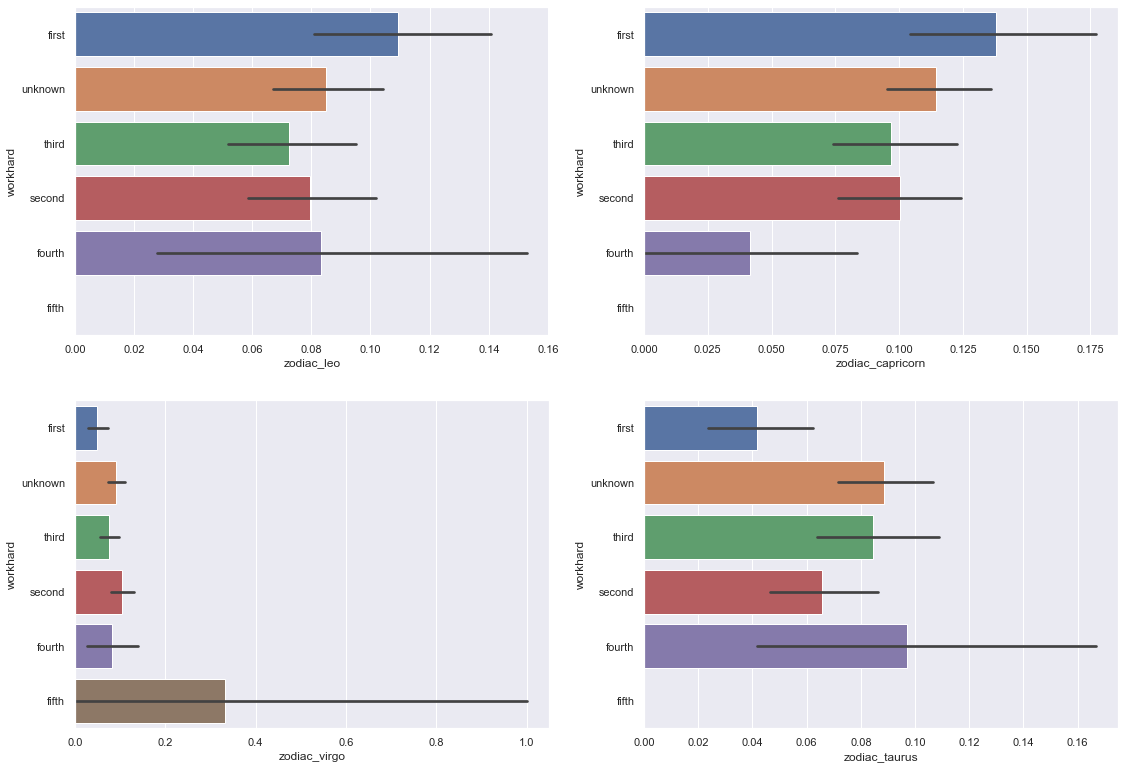

In [25]:
#visualization of the value counts of how the participants *group by zodiac* responded as 
#if Working hard was a first, second, third...fifth thing they would teach a child:
viz.work_viz(train)

### Driver survey responses 2) 
 <i>"In general, how would you rate your mental health, including your mood and your ability to think?"</i>

In [26]:
#chi_square test of all zodiacs to this driver question
explore.chi_square_mass_test(train, cat_cols=['hlthmntl'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,hlthmntl,libra,good,libra independent of good,0.244806,0.620757,False
1,zodiac,hlthmntl,sagittarius,good,sagittarius independent of good,0.210487,0.646386,False
2,zodiac,hlthmntl,virgo,good,virgo independent of good,6.915472,0.008545,True
3,zodiac,hlthmntl,scorpio,good,scorpio independent of good,1.674129,0.195706,False
4,zodiac,hlthmntl,pisces,good,pisces independent of good,0.048314,0.826024,False
...,...,...,...,...,...,...,...,...
67,zodiac,hlthmntl,capricorn,unknown,capricorn independent of unknown,2.501347,0.113749,False
68,zodiac,hlthmntl,leo,unknown,leo independent of unknown,0.000000,1.000000,False
69,zodiac,hlthmntl,aquarius,unknown,aquarius independent of unknown,0.404057,0.525002,False
70,zodiac,hlthmntl,gemini,unknown,gemini independent of unknown,0.329016,0.566239,False


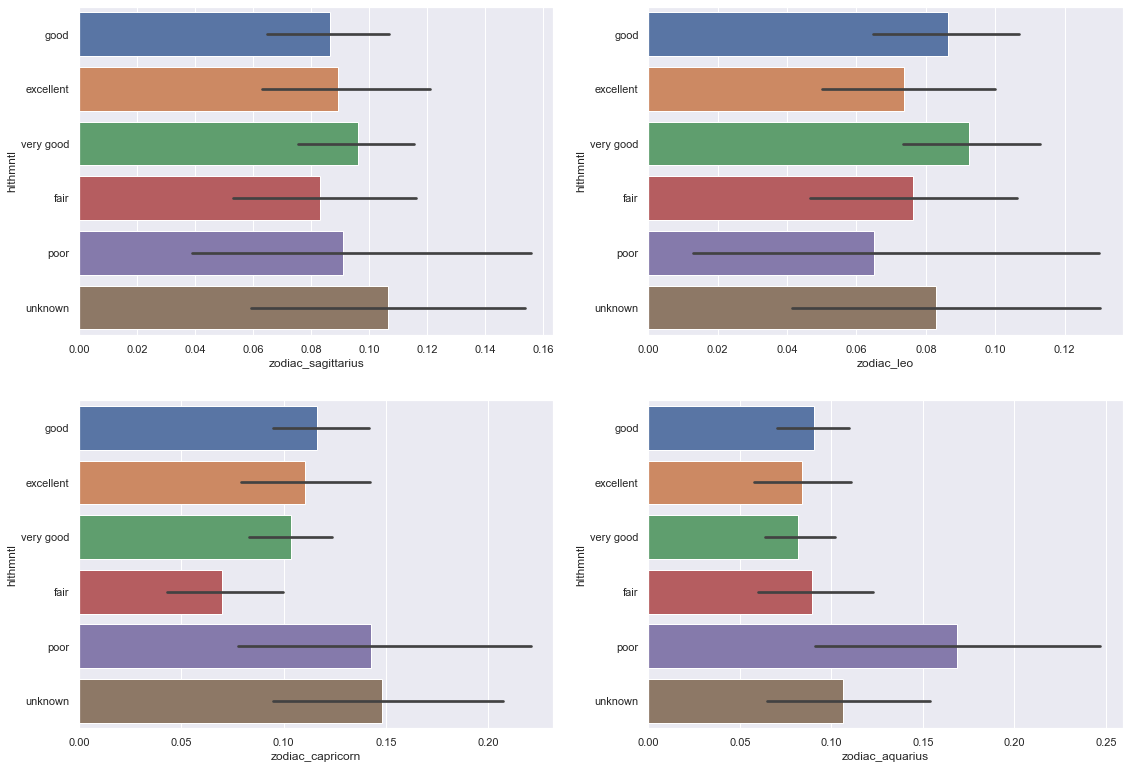

In [27]:
#visualization of value counts of how the zodiac signs responded to this question:
viz.feel_viz(train)

### Driver survey responses 3) 
 <i>""How often do you spend a social evening with relatives?""</i>

In [28]:
#chi_square test of all zodiacs to this driver question
explore.chi_square_mass_test(train, cat_cols=['socrel'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,socrel,libra,several times a year,libra independent of several times a year,0.547114,0.459499,False
1,zodiac,socrel,sagittarius,several times a year,sagittarius independent of several times a year,0.000000,1.000000,False
2,zodiac,socrel,virgo,several times a year,virgo independent of several times a year,0.000000,1.000000,False
3,zodiac,socrel,scorpio,several times a year,scorpio independent of several times a year,0.663911,0.415183,False
4,zodiac,socrel,pisces,several times a year,pisces independent of several times a year,7.988539,0.004707,True
...,...,...,...,...,...,...,...,...
91,zodiac,socrel,capricorn,almost daily,capricorn independent of almost daily,0.207317,0.648879,False
92,zodiac,socrel,leo,almost daily,leo independent of almost daily,1.493788,0.221630,False
93,zodiac,socrel,aquarius,almost daily,aquarius independent of almost daily,0.307211,0.579397,False
94,zodiac,socrel,gemini,almost daily,gemini independent of almost daily,0.065476,0.798041,False


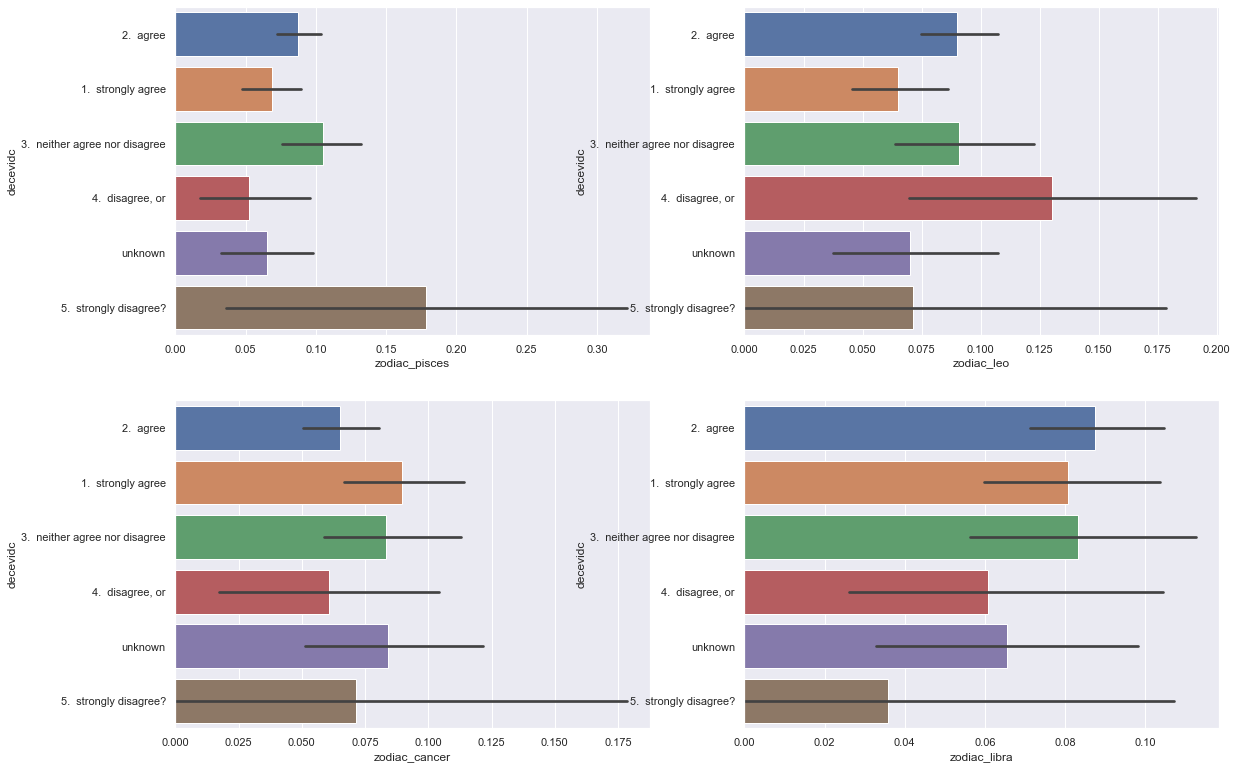

In [29]:
#viz function to show some zodiacs and this driver question:
viz.fam_viz(train)

### Driver survey responses 4) 
 <i>"When I make important decisions in my life, I rely mostly on reason and evidence."</i>

In [30]:
#chi_square test of all zodiacs to this driver question
explore.chi_square_mass_test(train, cat_cols=['decevidc'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,decevidc,libra,2. agree,libra independent of 2. agree,0.877985,0.348754,False
1,zodiac,decevidc,sagittarius,2. agree,sagittarius independent of 2. agree,0.012120,0.912339,False
2,zodiac,decevidc,virgo,2. agree,virgo independent of 2. agree,0.000000,1.000000,False
3,zodiac,decevidc,scorpio,2. agree,scorpio independent of 2. agree,0.116339,0.733039,False
4,zodiac,decevidc,pisces,2. agree,pisces independent of 2. agree,0.347048,0.555789,False
...,...,...,...,...,...,...,...,...
67,zodiac,decevidc,capricorn,5. strongly disagree?,capricorn independent of 5. strongly disagree?,0.000000,1.000000,False
68,zodiac,decevidc,leo,5. strongly disagree?,leo independent of 5. strongly disagree?,0.000000,1.000000,False
69,zodiac,decevidc,aquarius,5. strongly disagree?,aquarius independent of 5. strongly disagree?,0.459572,0.497824,False
70,zodiac,decevidc,gemini,5. strongly disagree?,gemini independent of 5. strongly disagree?,0.000000,1.000000,False


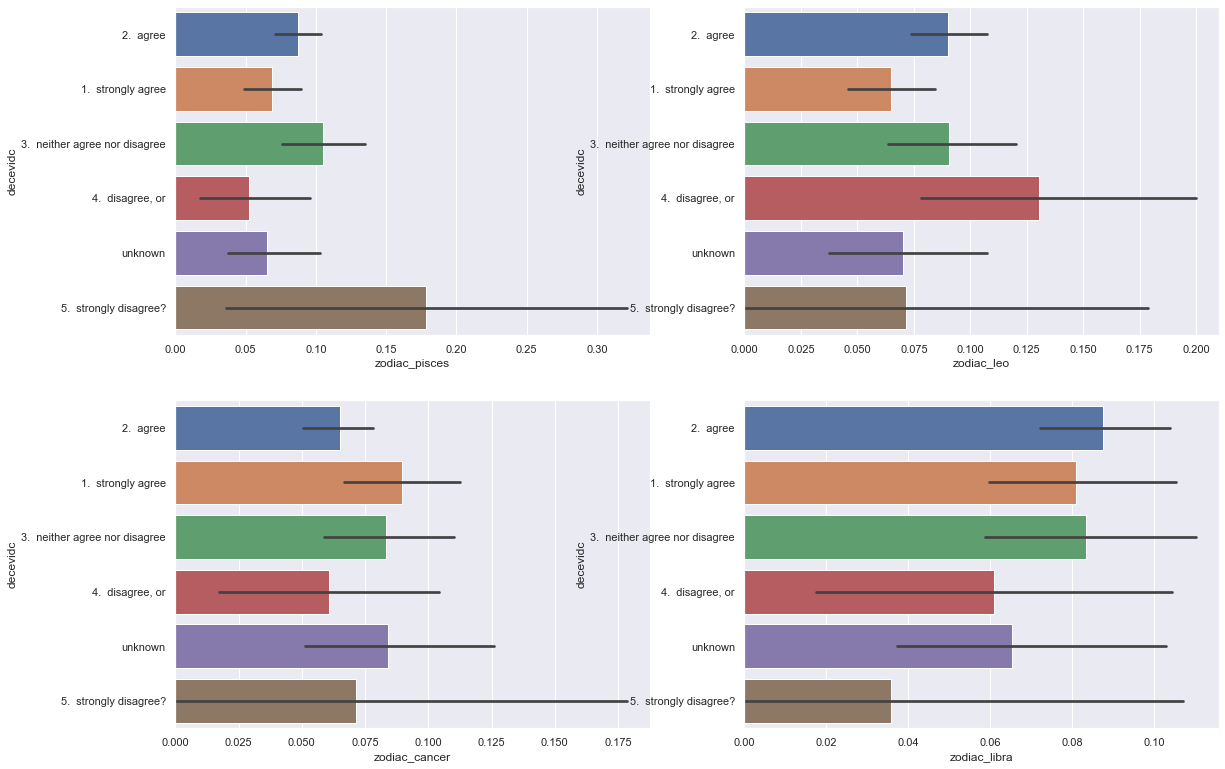

In [31]:
viz.fam_viz(train)

<a href='#quick_links'>Back to Quick Links</a>

# Modeling with the Zodiacs:<a name='Modeling'></a>

> ## Main Key Takeaways:
<div class="alert alert-info">
- I took the main drivers and encoded/created get_dummies to put these variables into the various models.<br>
- I trained models of these key drivers by using:<br>
    - Decision Tree model<br>
    - Random Forest model<br>
    - KNN Model (I created 4 different models with this using various n_neighbor counts)<br>
    - <b>BEST MODEL: Random Forest</div>

#### Modeling breakdown:

> #### Step one) Creating Baseline.
- To create my baseline, I had to find my top value_count of zodiac (or sign that most reoccurs), and I will set my baseline predictions as if everytime I predicted, it would always turn out this top zodiac sign.

In [32]:
train.zodiac.value_counts()

capricorn      271
sagittarius    228
aquarius       225
scorpio        219
virgo          212
leo            211
pisces         209
libra          204
taurus         188
cancer         188
gemini         183
aries          161
Name: zodiac, dtype: int64

In [33]:
#I created two new columns. One for baseline accuracy where every outcome is Capricorn, 
#and then actual column where it shows what sign it really was.
model.base_df(train, validate, test)
train.head(1)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,zodiac_gemini,zodiac_leo,zodiac_libra,zodiac_pisces,zodiac_sagittarius,zodiac_scorpio,zodiac_taurus,zodiac_virgo,baseline_prediction,actual
238,libra,white,"(36.0, 45.0]",female,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,0,0,1,0,0,0,0,0,capricorn,libra


<a href='#quick_links'>Back to Quick Links</a>

### Baseline Model accuracy Score:<a name='Baseline'></a>

In [34]:
#creating baseline model accuracy:
baseline_accuracy = (train.baseline_prediction == train.actual).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 10.84%


> #### Step Two) Encoding the main driver columns and dropping the rest to model on.

In [35]:
train, validate, test = model.dum_df(train, validate, test)
train.head(1)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,socrel_once or twice a week,socrel_several times a month,socrel_several times a year,socrel_unknown,decevidc_1. strongly agree,decevidc_2. agree,decevidc_3. neither agree nor disagree,"decevidc_4. disagree, or",decevidc_5. strongly disagree?,decevidc_unknown
238,libra,white,"(36.0, 45.0]",female,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,0,0,1,0,0,1,0,0,0,0


>#### Step Three) Creating X_train, X_validate, X_test to begin creating and fitting models onto:

In [36]:
X_train, X_validate, X_test = model.x_dfs(train, validate, test)

In [37]:
X_train.head(1)

,zodiac_aquarius,zodiac_aries,zodiac_cancer,zodiac_capricorn,zodiac_gemini,zodiac_leo,zodiac_libra,zodiac_pisces,zodiac_sagittarius,zodiac_scorpio,...,socrel_once or twice a week,socrel_several times a month,socrel_several times a year,socrel_unknown,decevidc_1. strongly agree,decevidc_2. agree,decevidc_3. neither agree nor disagree,"decevidc_4. disagree, or",decevidc_5. strongly disagree?,decevidc_unknown
238,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


<a href='#quick_links'>Back to Quick Links</a>

## Modeling Outcomes:<a name='Modeling Outcomes'></a>
### Key Takeaways:
Modeling results that were concluded for this dataset.
#### <br>BASELINE: <b>Accuracy score 10.84%</b>
- 1) Decision Tree: train 12% || validate 9%
- 2) <b>Random Forest: train 14% || validate 11%</b>
- 3) KNN (5n) : train 25% || validate 7%
- 4) KNN (10n) : train 23% || validate 9%
- 5) KNN (16n) : train 21% || validate 10%
- 6) KNN (20n) : train 20% || validate 10%

<br>From these results, I chose my MVP model to be Random Forest with max depth of 3, min leaf size 3, and estimators of 100.

## MVP MODEL Training Outcomes:<a name='MVP'></a>

### Random Forest Model
- max depth 3
- min leaf sample size 3
- estimators 100

In [38]:
#imports for models:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [47]:
# create X & y version of train, where y is a series with just the target variable and X are all the driver features. 
train, validate, test = wrangle.split(df)

#get_dummies for driver columns:
dummy_rf = pd.get_dummies(train[['workhard','hlthmntl','socrel','decevidc']], dummy_na=False, drop_first= False, dtype=int)
train = pd.concat([train, dummy_rf], axis=1)

dummy_rf2 = pd.get_dummies(validate[['workhard','hlthmntl','socrel','decevidc']], dummy_na=False, drop_first= False)
validate = pd.concat([validate, dummy_rf2], axis=1)

dummy_rf3 = pd.get_dummies(test[['workhard','hlthmntl','socrel','decevidc']], dummy_na=False, drop_first= False, dtype=int)
test = pd.concat([test, dummy_rf3], axis=1)

X_train2 = train.drop(columns=['zodiac', 'race', 'age', 'sex', 'sexornt', 'marital', 'res16', 'reg16',
       'degree', 'income', 'wrkslf', 'satjob', 'occ10', 'partyid', 'if16who',
       'polviews', 'gunlaw', 'grassv', 'relig', 'postlifev', 'postlifenv',
       'sprtprsn', 'sprtconnct', 'sprtlrgr', 'sprtpurp', 'happy', 'life',
       'obey', 'popular', 'thnkself', 'workhard', 'helpoth', 'grtwrks',
       'freemind', 'decevidc', 'advfmsci', 'mditate1', 'health', 'hlthphys',
       'hlthmntl', 'enjoynat', 'eatmeat', 'recycle', 'nobuygrn', 'fairv',
       'fairnv', 'helpfulv', 'helpfulnv', 'trustv', 'trustnv', 'conmedic',
       'contv', 'conpress', 'consci', 'conjudge', 'conlegis', 'socbar',
       'socrel', 'socommun', 'socfrend', 'satsoc', 'class', 'satfin',
       'quallife', 'partners', 'partnrs5','workhard_fifth'])
y_train2 = train.zodiac

X_validate2 = validate.drop(columns=['zodiac', 'race', 'age', 'sex', 'sexornt', 'marital', 'res16', 'reg16',
       'degree', 'income', 'wrkslf', 'satjob', 'occ10', 'partyid', 'if16who',
       'polviews', 'gunlaw', 'grassv', 'relig', 'postlifev', 'postlifenv',
       'sprtprsn', 'sprtconnct', 'sprtlrgr', 'sprtpurp', 'happy', 'life',
       'obey', 'popular', 'thnkself', 'workhard', 'helpoth', 'grtwrks',
       'freemind', 'decevidc', 'advfmsci', 'mditate1', 'health', 'hlthphys',
       'hlthmntl', 'enjoynat', 'eatmeat', 'recycle', 'nobuygrn', 'fairv',
       'fairnv', 'helpfulv', 'helpfulnv', 'trustv', 'trustnv', 'conmedic',
       'contv', 'conpress', 'consci', 'conjudge', 'conlegis', 'socbar',
       'socrel', 'socommun', 'socfrend', 'satsoc', 'class', 'satfin',
       'quallife', 'partners', 'partnrs5'])
y_validate2 = validate.zodiac

X_test2 = test.drop(columns=['zodiac', 'race', 'age', 'sex', 'sexornt', 'marital', 'res16', 'reg16',
       'degree', 'income', 'wrkslf', 'satjob', 'occ10', 'partyid', 'if16who',
       'polviews', 'gunlaw', 'grassv', 'relig', 'postlifev', 'postlifenv',
       'sprtprsn', 'sprtconnct', 'sprtlrgr', 'sprtpurp', 'happy', 'life',
       'obey', 'popular', 'thnkself', 'workhard', 'helpoth', 'grtwrks',
       'freemind', 'decevidc', 'advfmsci', 'mditate1', 'health', 'hlthphys',
       'hlthmntl', 'enjoynat', 'eatmeat', 'recycle', 'nobuygrn', 'fairv',
       'fairnv', 'helpfulv', 'helpfulnv', 'trustv', 'trustnv', 'conmedic',
       'contv', 'conpress', 'consci', 'conjudge', 'conlegis', 'socbar',
       'socrel', 'socommun', 'socfrend', 'satsoc', 'class', 'satfin',
       'quallife', 'partners', 'partnrs5','workhard_fifth'])
y_test2 = test.zodiac

Train: 2499 rows, 66 cols
Validate: 625 rows, 66 cols
Test: 552 rows, 66 cols


In [48]:
#creating the Random Forest classifier
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [49]:
#fitting the RF model to dataset:
rf.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [50]:
#Making predictions
y_pred = rf.predict(X_train2)

#creating estimated probability of zodiac prediction model:
y_pred_proba = rf.predict_proba(X_train2)

#### Evaluating the Random Forest Model:

In [51]:
#Evaluating the model:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train2, y_train2)))

Accuracy of random forest classifier on training set: 0.14


In [52]:
print(classification_report(y_train2, y_pred))

              precision    recall  f1-score   support

    aquarius       0.33      0.07      0.12       225
       aries       0.00      0.00      0.00       161
      cancer       0.30      0.03      0.06       188
   capricorn       0.12      0.89      0.22       271
      gemini       0.00      0.00      0.00       183
         leo       0.12      0.02      0.04       211
       libra       0.17      0.06      0.09       204
      pisces       0.26      0.09      0.13       209
 sagittarius       0.15      0.08      0.11       228
     scorpio       0.27      0.10      0.15       219
      taurus       0.27      0.02      0.04       188
       virgo       0.13      0.05      0.07       212

    accuracy                           0.14      2499
   macro avg       0.18      0.12      0.08      2499
weighted avg       0.18      0.14      0.09      2499



#### Validating RF model:

In [53]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate2, y_validate2)))

Accuracy of random forest classifier on test set: 0.11


### After several KNN models, I came back to RF as it's training performance and validation weren't too far apart.

#### After selecting, re-creating to then put through Test:

In [54]:
#calling back the predictions and probability of Random forest but with test
y_pred = rf.predict(X_test2)

#creating estimated probability of zodiac prediction model:
y_pred_proba = rf.predict_proba(X_test2)

In [55]:
#Evaluating the model:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test2, y_test2)))

Accuracy of random forest classifier on test set: 0.10


In [56]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

    aquarius       0.09      0.02      0.04        44
       aries       0.00      0.00      0.00        36
      cancer       0.20      0.02      0.04        45
   capricorn       0.10      0.76      0.18        58
      gemini       0.00      0.00      0.00        34
         leo       0.00      0.00      0.00        45
       libra       0.06      0.02      0.03        54
      pisces       0.14      0.09      0.11        34
 sagittarius       0.06      0.04      0.05        50
     scorpio       0.13      0.03      0.05        60
      taurus       0.00      0.00      0.00        45
       virgo       0.05      0.02      0.03        47

    accuracy                           0.10       552
   macro avg       0.07      0.08      0.04       552
weighted avg       0.07      0.10      0.05       552



<a href='#quick_links'>Back to Quick Links</a>

## Overall Takeaway:<a name='Takeaway'></a>
<br>The model did not beat baseline but rather stayed mostly the same. 

### Next steps:
<br> If I was to continue trying to use the GSS responses to predict participants zodiac, I would take the next steps of:
- 1) Pulling data from multiple years, to create a larger dataset.
- 2) See if I could collaborate with a person that knows astrology better than myself to determine which survey questions are more inline with Sun sign perspectives.
- 3) I would also try using a cluster and feature engineering method to allow the computer to find predictors that I may be missing.

- Overall, my hypothesis that survey responses could possibly be in predictors of participants zodiac sign failed to reject the null. 

- From the results that I have conducted, measured and modeled, I would say that the GSS survey response are not good indicators or predictors of a person's zodiac. Personally I also think it would be a hard thing to measure just by a person's response to a survey.